In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/GROCERY.csv')
df.head(n=25)

Water_(g)  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Ash_(g)  \
0       15.87         717         0.85          81.11     2.11   
1       16.72         718         0.49          78.30     1.62   
2        0.24         876         0.28          99.48     0.00   
3       88.20          61         3.10           3.46     0.78   
4        2.47         496        26.32          26.71     6.08   
5        3.16         362        36.16           0.77     7.93   
6        3.96         358        35.10           0.72     8.03   
7        4.90         354        35.50           0.20     7.60   
8        2.97         387        34.30           5.78     7.95   
9       27.16         321         7.91           8.70     1.83   
10      74.04         134         6.81           7.56     1.55   
11      79.40          78         7.55           0.20     1.50   
12      82.30          83         3.17           3.39     0.80   
13      82.17          76         2.99           1.90     0.81   
14      84.91          62         3.46           1.00     0.78   
15      82.45          77         3.52           2.34     0.65   
16      42.41         353        21.40          28.74     5.11   
17      41.11         371        23.24          29.68     3.18   
18      48.42         334        20.75          27.68     2.70   
19      51.80         300        19.80          24.26     3.68   
20      39.28         376        25.18          29.20     3.28   
21      37.02         404        22.87          33.31     3.71   
22      37.65         387        23.37          30.60     3.60   
23      38.20         394        23.76          32.11     3.36   
24      79.79          98        11.12           4.30     1.41   

    Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  Iron_(mg)  \
0             0.06           0.0           0.06            24       0.02   
1             2.87           0.0           0.06            23       0.05   
2             0.00           0.0           0.00             4       0.00   
3             4.46           0.0           4.46           101       0.05   
4            38.42           0.0          38.42           912       0.47   
5            51.98           0.0          51.98          1257       0.32   
6            52.19           0.0          52.19          1231       0.31   
7            51.80           0.0           0.00           280       0.32   
8            49.00           0.0          49.00          1184       0.30   
9            54.40           0.0          54.40           284       0.19   
10           10.04           0.0          10.04           261       0.19   
11           11.35           0.0          11.35           290       0.29   
12           10.34           0.8           9.54           112       0.24   
13           12.13           0.7           9.55           109       0.24   
14            9.86           0.1           9.94           129       0.23   
15           10.74           1.0           9.66           114       0.42   
16            2.34           0.0           0.50           528       0.31   
17            2.79           0.0           0.51           674       0.43   
18            0.45           0.0           0.45           184       0.43   
19            0.46           0.0           0.46           388       0.33   
20            3.06           0.0           0.00           673       0.64   
21            3.09           0.0           0.48           710       0.14   
22            4.78           0.0           0.00           643       0.21   
23            2.57           0.0           0.52           685       0.76   
24            3.38           0.0           2.67            83       0.07   

    Magnesium_(mg)  Phosphorus_(mg)  Potassium_(mg)  Sodium_(mg)  Zinc_(mg)  \
0                2               24              24          643       0.09   
1                1               24              41          583       0.05   
2                0                3               5            2       0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Water_(g)        249 non-null    float64
 1   Energ_Kcal       249 non-null    int64  
 2   Protein_(g)      249 non-null    float64
 3   Lipid_Tot_(g)    249 non-null    float64
 4   Ash_(g)          249 non-null    float64
 5   Carbohydrt_(g)   249 non-null    float64
 6   Fiber_TD_(g)     249 non-null    float64
 7   Sugar_Tot_(g)    249 non-null    float64
 8   Calcium_(mg)     249 non-null    int64  
 9   Iron_(mg)        249 non-null    float64
 10  Magnesium_(mg)   249 non-null    int64  
 11  Phosphorus_(mg)  249 non-null    int64  
 12  Potassium_(mg)   249 non-null    int64  
 13  Sodium_(mg)      249 non-null    int64  
 14  Zinc_(mg)        249 non-null    float64
 15  Copper_mg)       249 non-null    float64
 16  Manganese_(mg)   249 non-null    float64
 17  Selenium_(µg)   

In [ ]:
y = df['Updated Sugar']
target = df['Updated Sugar'].to_numpy()

In [ ]:
X = df.iloc[:,0:8]
X.head(10)

Water_(g)  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  \
0      15.87         717         0.85          81.11     2.11            0.06   
1      16.72         718         0.49          78.30     1.62            2.87   
2       0.24         876         0.28          99.48     0.00            0.00   
3      88.20          61         3.10           3.46     0.78            4.46   
4       2.47         496        26.32          26.71     6.08           38.42   
5       3.16         362        36.16           0.77     7.93           51.98   
6       3.96         358        35.10           0.72     8.03           52.19   
7       4.90         354        35.50           0.20     7.60           51.80   
8       2.97         387        34.30           5.78     7.95           49.00   
9      27.16         321         7.91           8.70     1.83           54.40   

   Fiber_TD_(g)  Sugar_Tot_(g)  
0           0.0           0.06  
1           0.0           0.06  
2           0.0           0.00  
3           0.0           4.46  
4           0.0          38.42  
5           0.0          51.98  
6           0.0          52.19  
7           0.0           0.00  
8           0.0          49.00  
9           0.0          54.40

In [ ]:
X.describe().transpose()

count        mean         std    min    25%     50%     75%  \
Water_(g)       249.0   58.258474   26.057926   0.24  42.17   63.60   79.62   
Energ_Kcal      249.0  224.919679  155.851827  24.00  88.00  185.00  351.00   
Protein_(g)     249.0   13.827510   14.039983   0.28   3.56    9.07   21.56   
Lipid_Tot_(g)   249.0   13.684337   15.243673   0.00   1.30    9.47   24.31   
Ash_(g)         249.0    2.510080    2.354234   0.00   0.77    1.20    3.83   
Carbohydrt_(g)  249.0   11.727028   14.394958   0.00   2.98    5.52   13.80   
Fiber_TD_(g)    249.0    0.225703    0.938718   0.00   0.00    0.00    0.00   
Sugar_Tot_(g)   249.0    8.019197   12.643680   0.00   0.49    4.00    9.54   

                   max  
Water_(g)        93.42  
Energ_Kcal      876.00  
Protein_(g)      84.08  
Lipid_Tot_(g)    99.48  
Ash_(g)          10.77  
Carbohydrt_(g)   75.42  
Fiber_TD_(g)      7.40  
Sugar_Tot_(g)    74.46

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

count          mean       std       min       25%       50%  \
Water_(g)       249.0 -1.783491e-16  1.002014 -2.231004 -0.618655  0.205399   
Energ_Kcal      249.0  6.420567e-17  1.002014 -1.291768 -0.880294 -0.256655   
Protein_(g)     249.0 -4.993774e-17  1.002014 -0.966867 -0.732778 -0.339537   
Lipid_Tot_(g)   249.0  8.560756e-17  1.002014 -0.899514 -0.814061 -0.277022   
Ash_(g)         249.0 -2.853585e-17  1.002014 -1.068346 -0.740617 -0.557599   
Carbohydrt_(g)  249.0  7.133963e-17  1.002014 -0.816303 -0.608869 -0.432063   
Fiber_TD_(g)    249.0  0.000000e+00  1.002014 -0.240922 -0.240922 -0.240922   
Sugar_Tot_(g)   249.0 -1.783491e-17  1.002014 -0.635523 -0.596690 -0.318522   

                     75%       max  
Water_(g)       0.821422  1.352078  
Energ_Kcal      0.810605  4.185974  
Protein_(g)     0.551857  5.013823  
Lipid_Tot_(g)   0.698458  5.639616  
Ash_(g)         0.561787  3.515605  
Carbohydrt_(g)  0.144297  4.433584  
Fiber_TD_(g)   -0.240922  7.658047  
Sugar_Tot_(g)   0.120524  5.265447

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

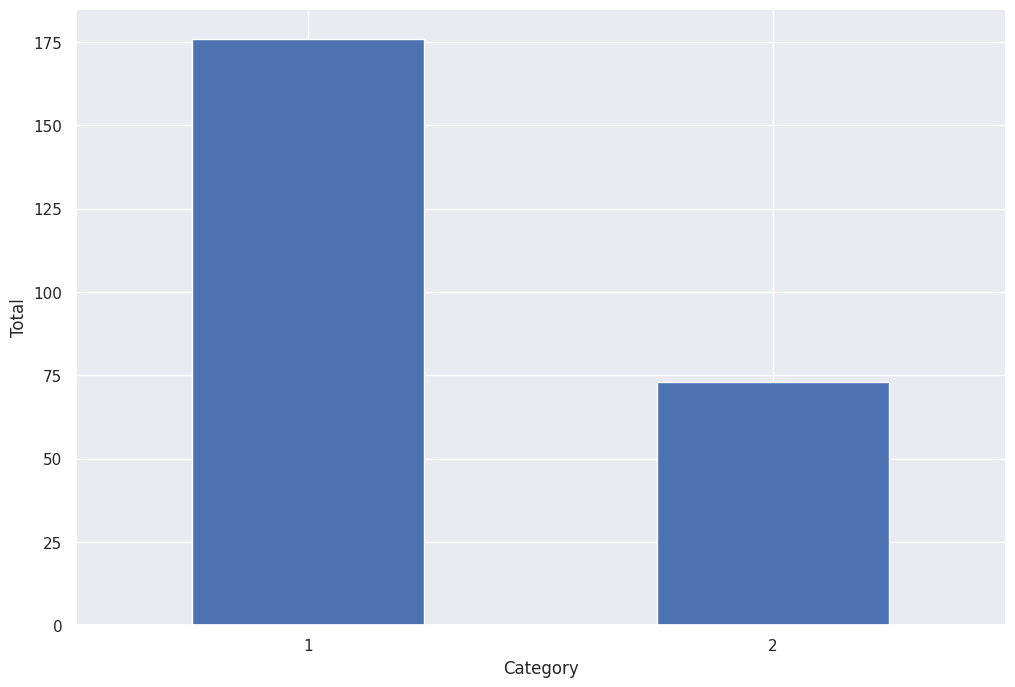

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()

<ipython-input-11-2ae9b7838308>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


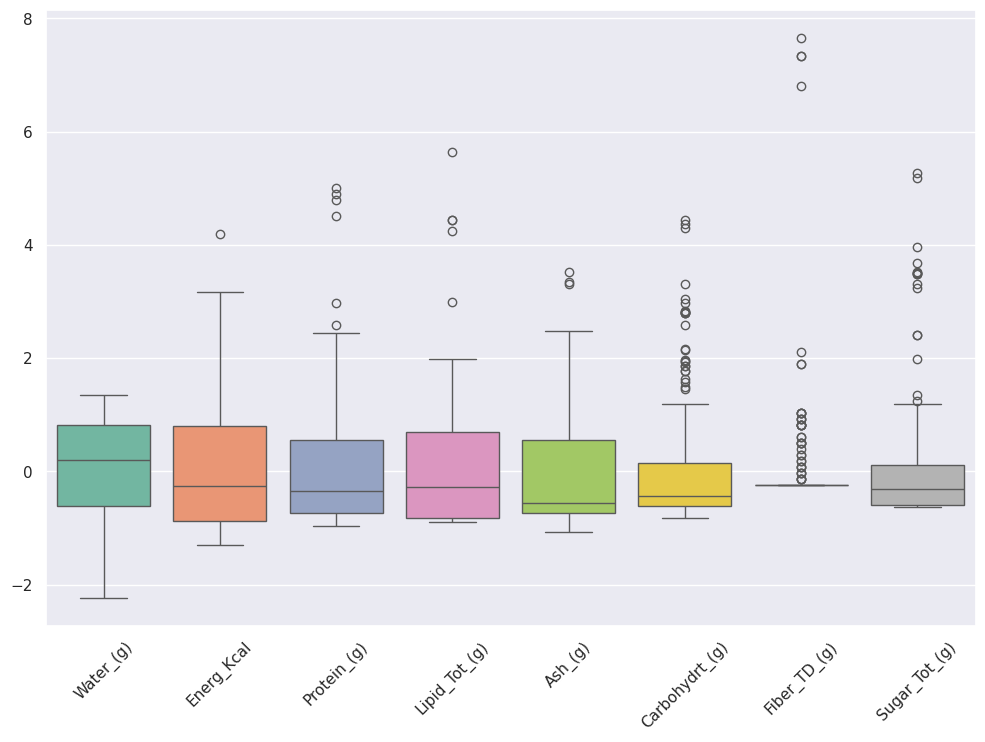

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-12-22fad8361788>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


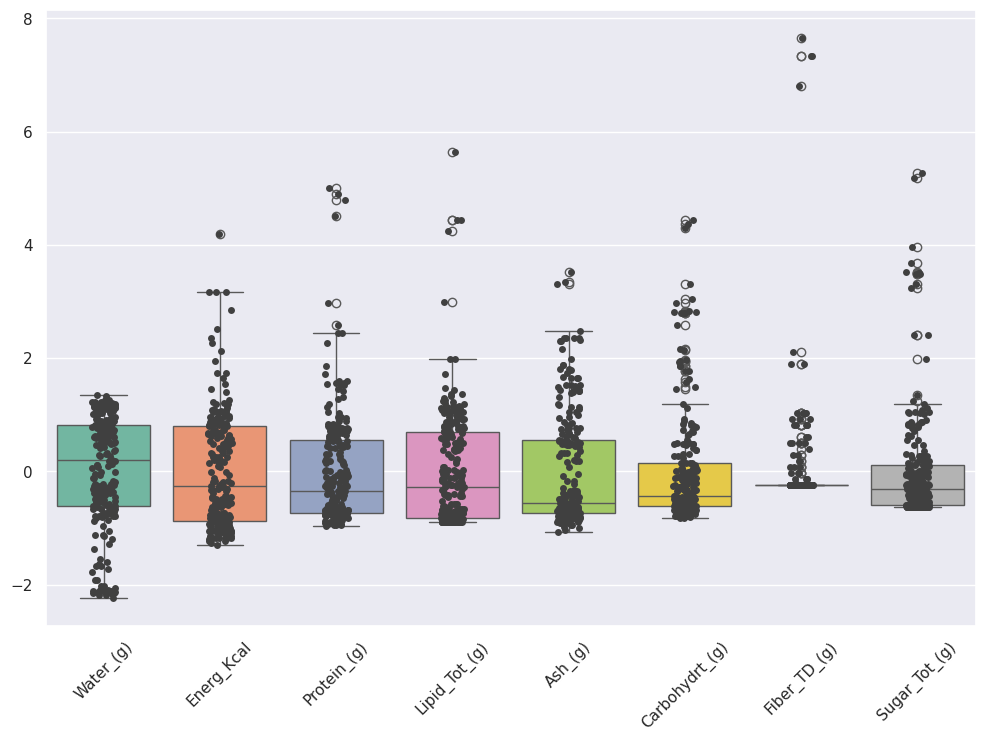

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [ ]:
df.describe()

Water_(g)    Energ_Kcal   Protein_(g)  Lipid_Tot_(g)       Ash_(g)  \
count  2.490000e+02  2.490000e+02  2.490000e+02   2.490000e+02  2.490000e+02   
mean  -1.783491e-16  6.420567e-17 -4.993774e-17   8.560756e-17 -2.853585e-17   
std    1.002014e+00  1.002014e+00  1.002014e+00   1.002014e+00  1.002014e+00   
min   -2.231004e+00 -1.291768e+00 -9.668670e-01  -8.995141e-01 -1.068346e+00   
25%   -6.186554e-01 -8.802941e-01 -7.327780e-01  -8.140611e-01 -7.406167e-01   
50%    2.053995e-01 -2.566546e-01 -3.395369e-01  -2.770215e-01 -5.575992e-01   
75%    8.214219e-01  8.106049e-01  5.518571e-01   6.984579e-01  5.617870e-01   
max    1.352078e+00  4.185974e+00  5.013823e+00   5.639616e+00  3.515605e+00   

       Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  
count    2.490000e+02    249.000000   2.490000e+02  
mean     7.133963e-17      0.000000  -1.783491e-17  
std      1.002014e+00      1.002014   1.002014e+00  
min     -8.163030e-01     -0.240922  -6.355229e-01  
25%     -6.088691e-01     -0.240922  -5.966903e-01  
50%     -4.320631e-01     -0.240922  -3.185221e-01  
75%      1.442969e-01     -0.240922   1.205240e-01  
max      4.433584e+00      7.658047   5.265447e+00

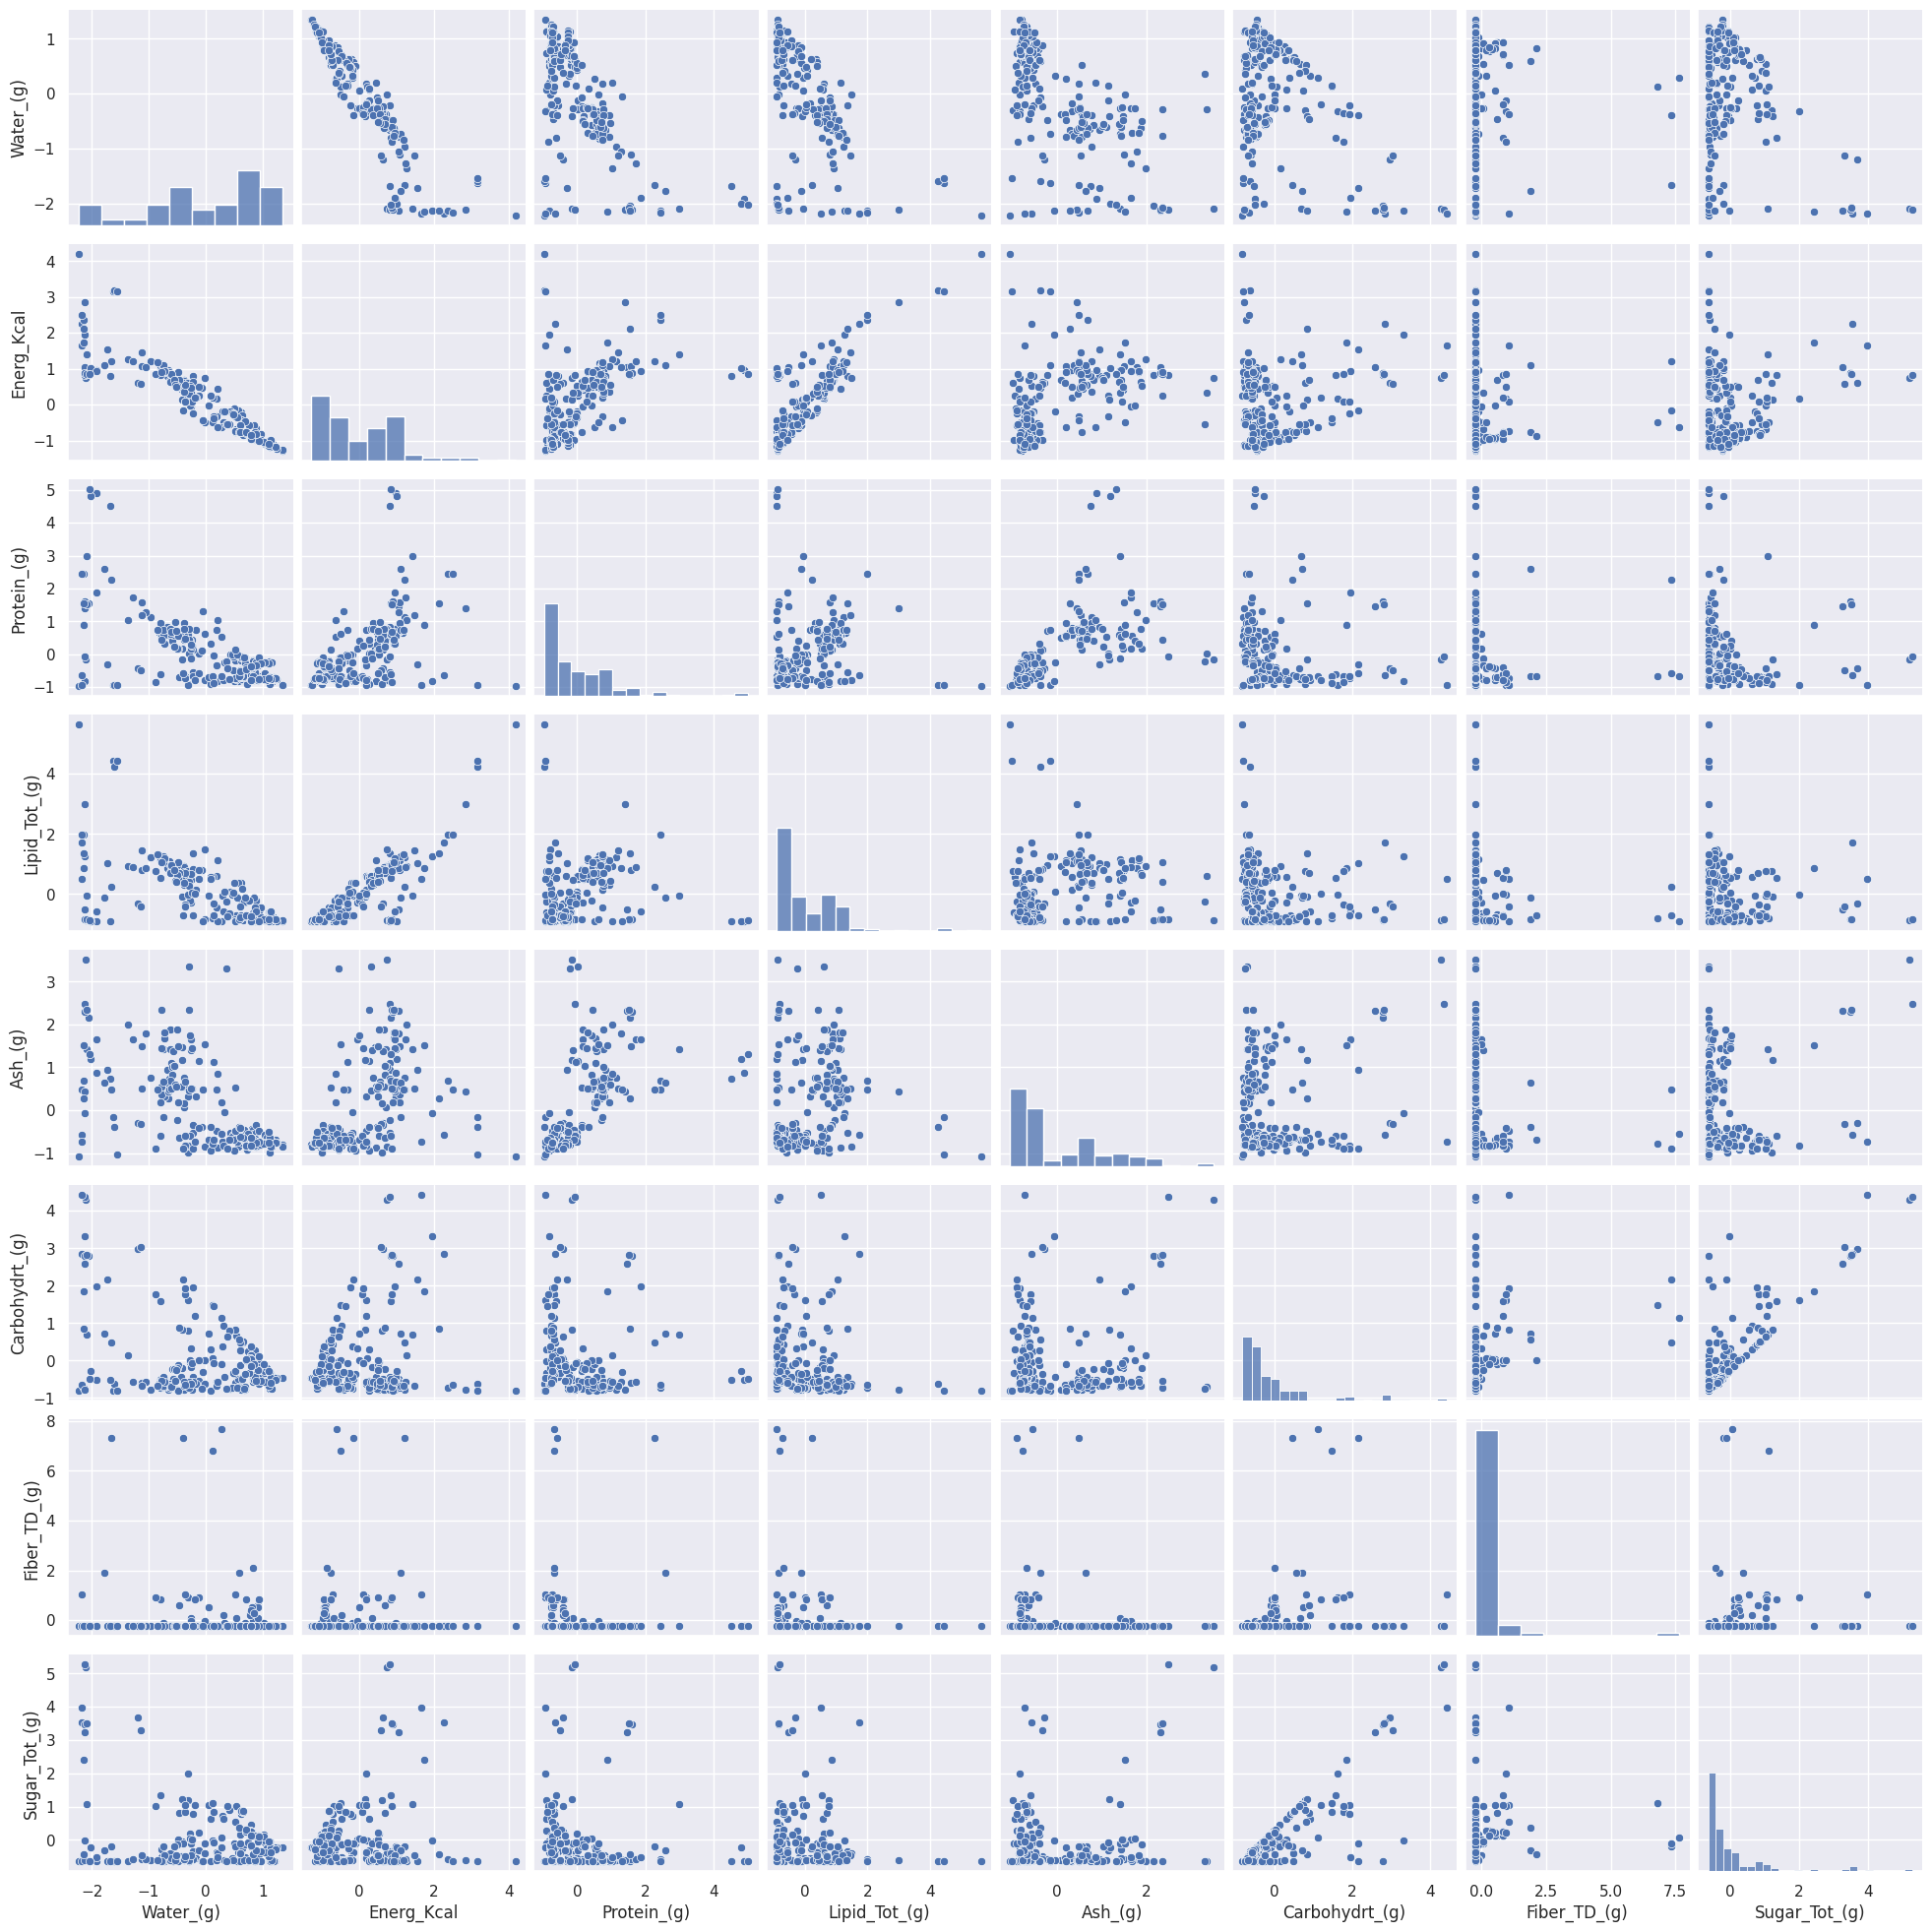

In [ ]:
sns.pairplot(df)

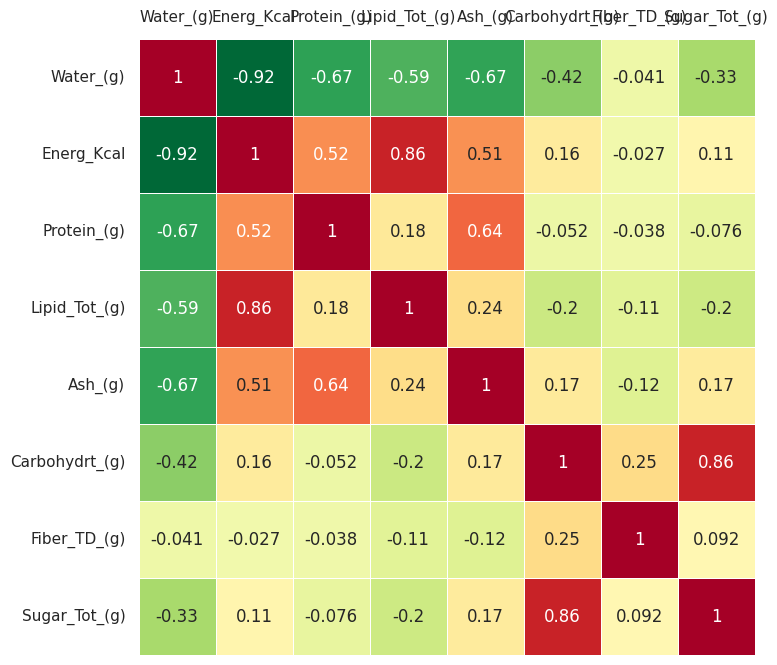

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, 'A2')

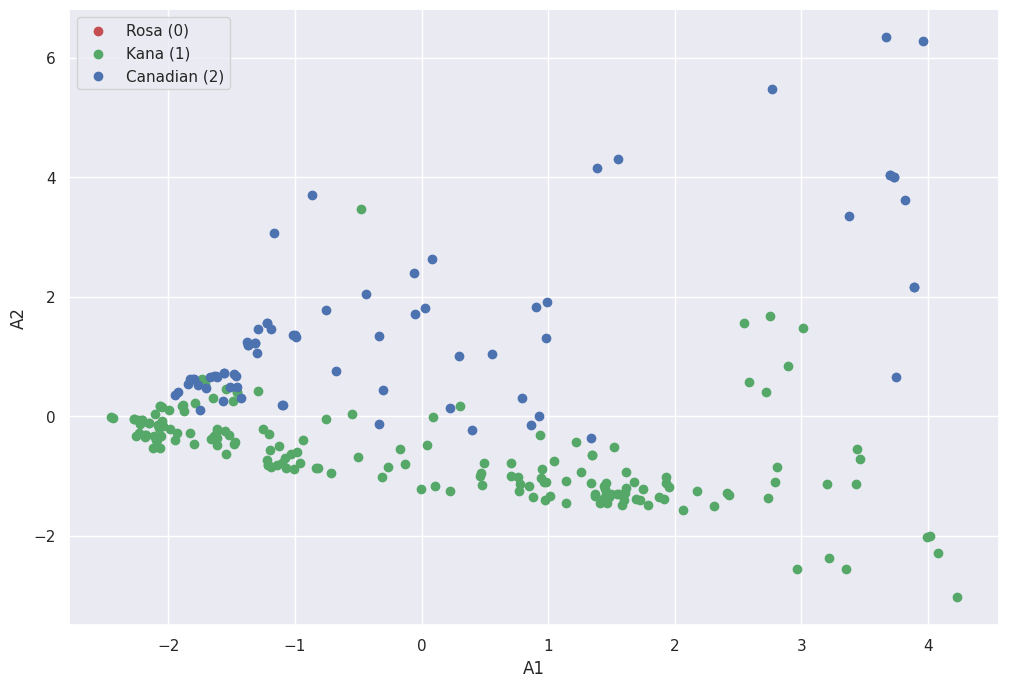

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')

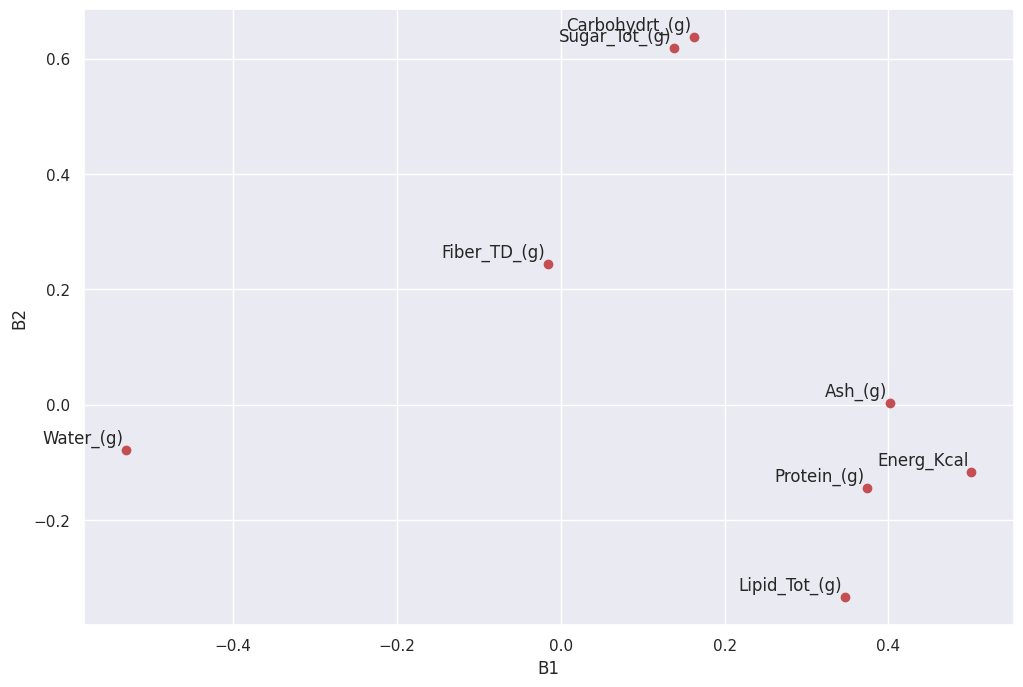

In [ ]:
A = pca.components_.T
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


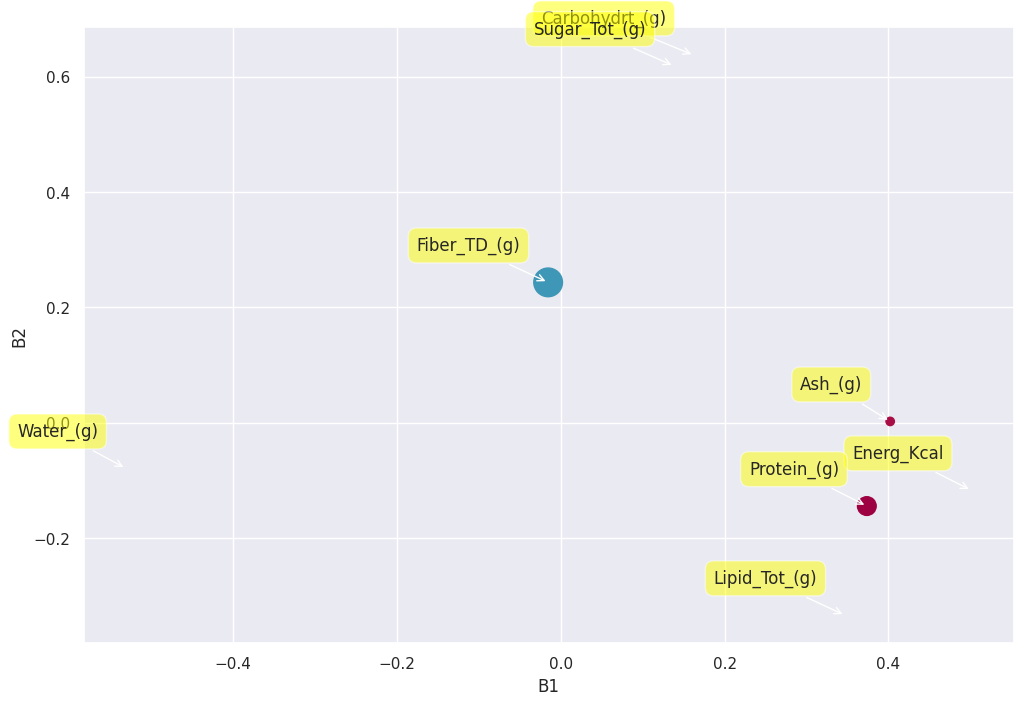

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

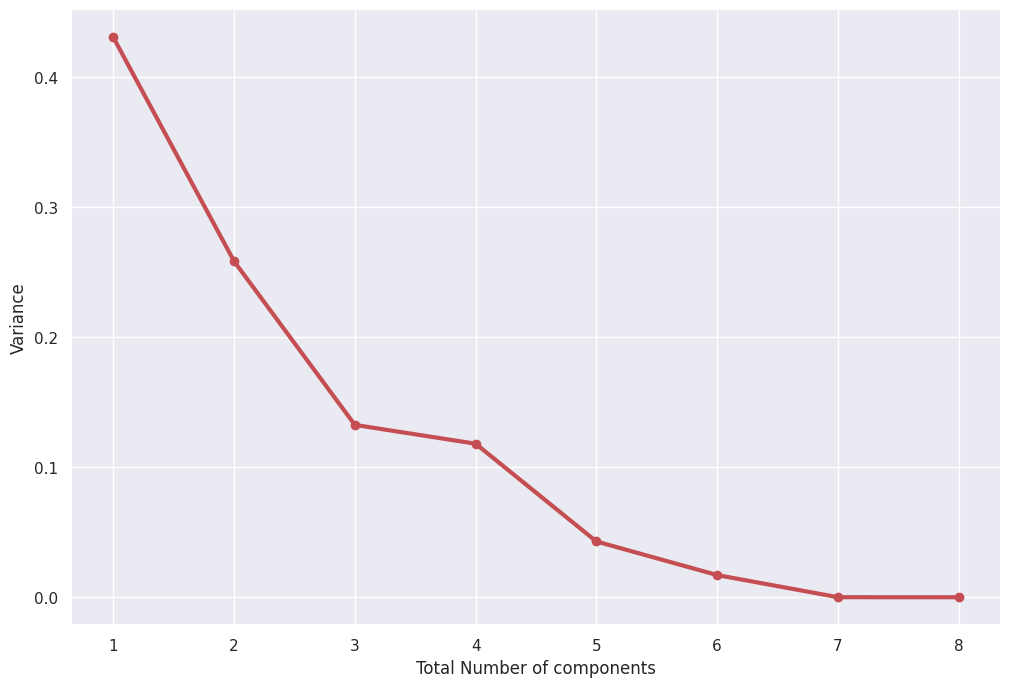

[3.46025755e+00 2.07623448e+00 1.06502984e+00 9.48726848e-01
 3.44568252e-01 1.37125433e-01 2.92418882e-04 2.32386212e-05]


In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Total Number of components')
plt.ylabel('Variance')
plt.show()
print(Lambda)

Text(0, 0.5, 'Cumulative Variance')

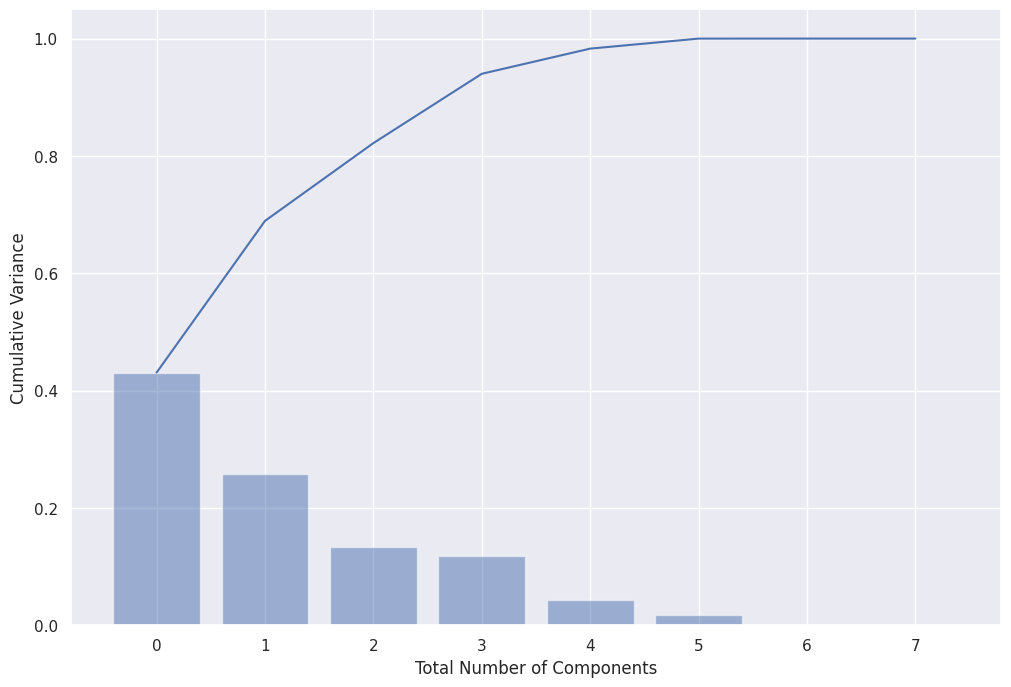

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Total Number of Components')
plt.ylabel('Cumulative Variance')

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance


{'0': 'PC 1 (43.1%)',
 '1': 'PC 2 (25.8%)',
 '2': 'PC 3 (13.3%)',
 '3': 'PC 4 (11.8%)',
 '4': 'PC 5 (4.3%)',
 '5': 'PC 6 (1.7%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)'}

[[-5.30447759e-01 -7.92265870e-02 -4.88588926e-02 -2.61064393e-02
   1.71106243e-01 -1.71707166e-01 -3.63516277e-01  7.19982503e-01]
 [ 5.01103803e-01 -1.17140977e-01  3.00659588e-01 -8.01322029e-02
  -1.07805982e-01  2.69873309e-02 -7.91179083e-01  6.38954067e-03]
 [ 3.73574665e-01 -1.44563649e-01 -4.84276825e-01  3.62997874e-01
  -5.37679590e-01 -1.55770695e-01  1.08274393e-01  3.84921584e-01]
 [ 3.46977387e-01 -3.33878089e-01  5.35829552e-01 -2.04382446e-01
   1.46307822e-01 -1.51166542e-01  4.71780751e-01  4.15225532e-01]
 [ 4.02074289e-01  2.22513692e-03 -4.63039962e-01  7.29566773e-02
   7.82936332e-01  7.71088279e-03 -3.49095498e-02  6.58422175e-02]
 [ 1.62785932e-01  6.37114460e-01  6.97493264e-02 -1.02559017e-01
  -7.04436696e-02  6.19863973e-01  7.96044083e-02  3.95818226e-01]
 [-1.52775495e-02  2.43303993e-01  4.07790927e-01  8.53379948e-01
   1.69872430e-01 -1.30917967e-01 -4.77645831e-03  1.29199302e-04]
 [ 1.38464510e-01  6.18474974e-01 -3.85396658e-03 -2.74334248e-01
  -

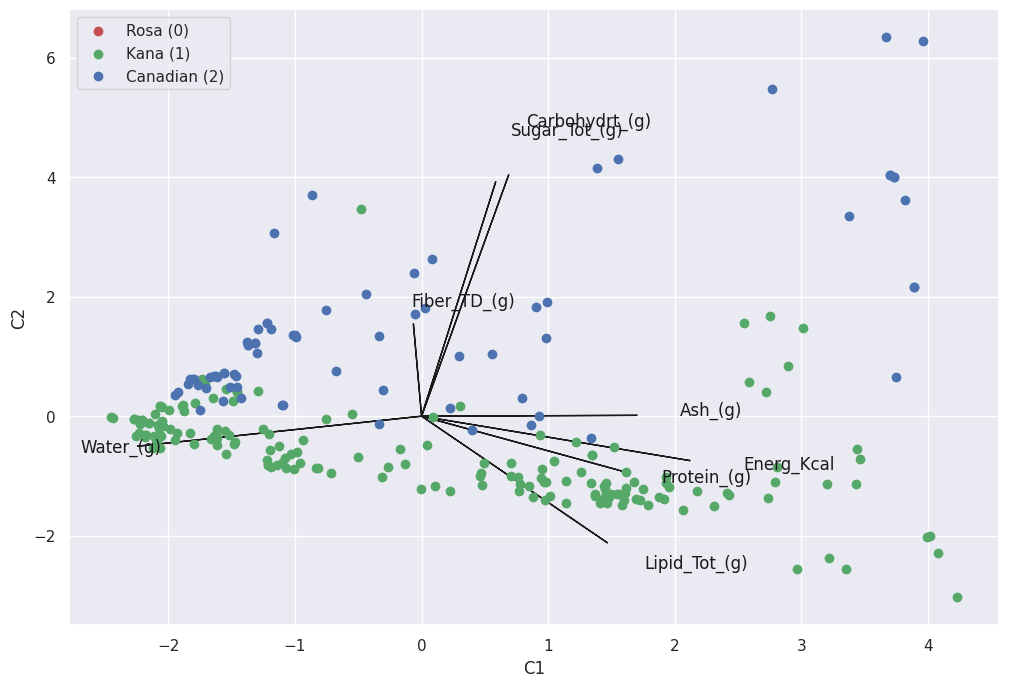

In [ ]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('C1')
plt.ylabel('C2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
print(A)

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC         feature   loading  type
0  PC1       Water_(g) -0.530448  best
1  PC2  Carbohydrt_(g)  0.637114  best
2  PC3   Lipid_Tot_(g)  0.535830  best
3  PC4    Fiber_TD_(g)  0.853380  best
4  PC5         Ash_(g)  0.782936  best
5  PC1      Energ_Kcal  0.501104  weak
6  PC5     Protein_(g) -0.537680  weak
7  PC2   Sugar_Tot_(g)  0.618475  weak


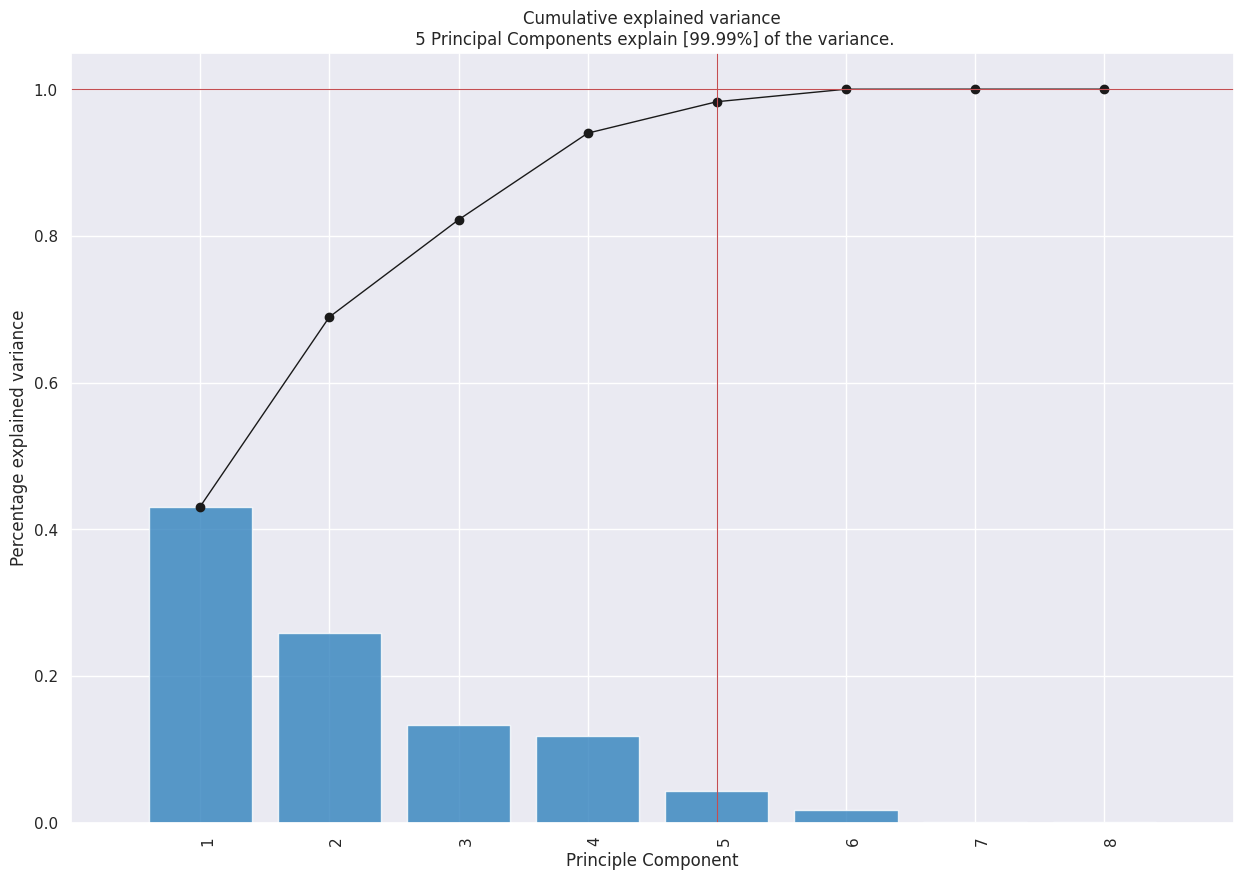

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


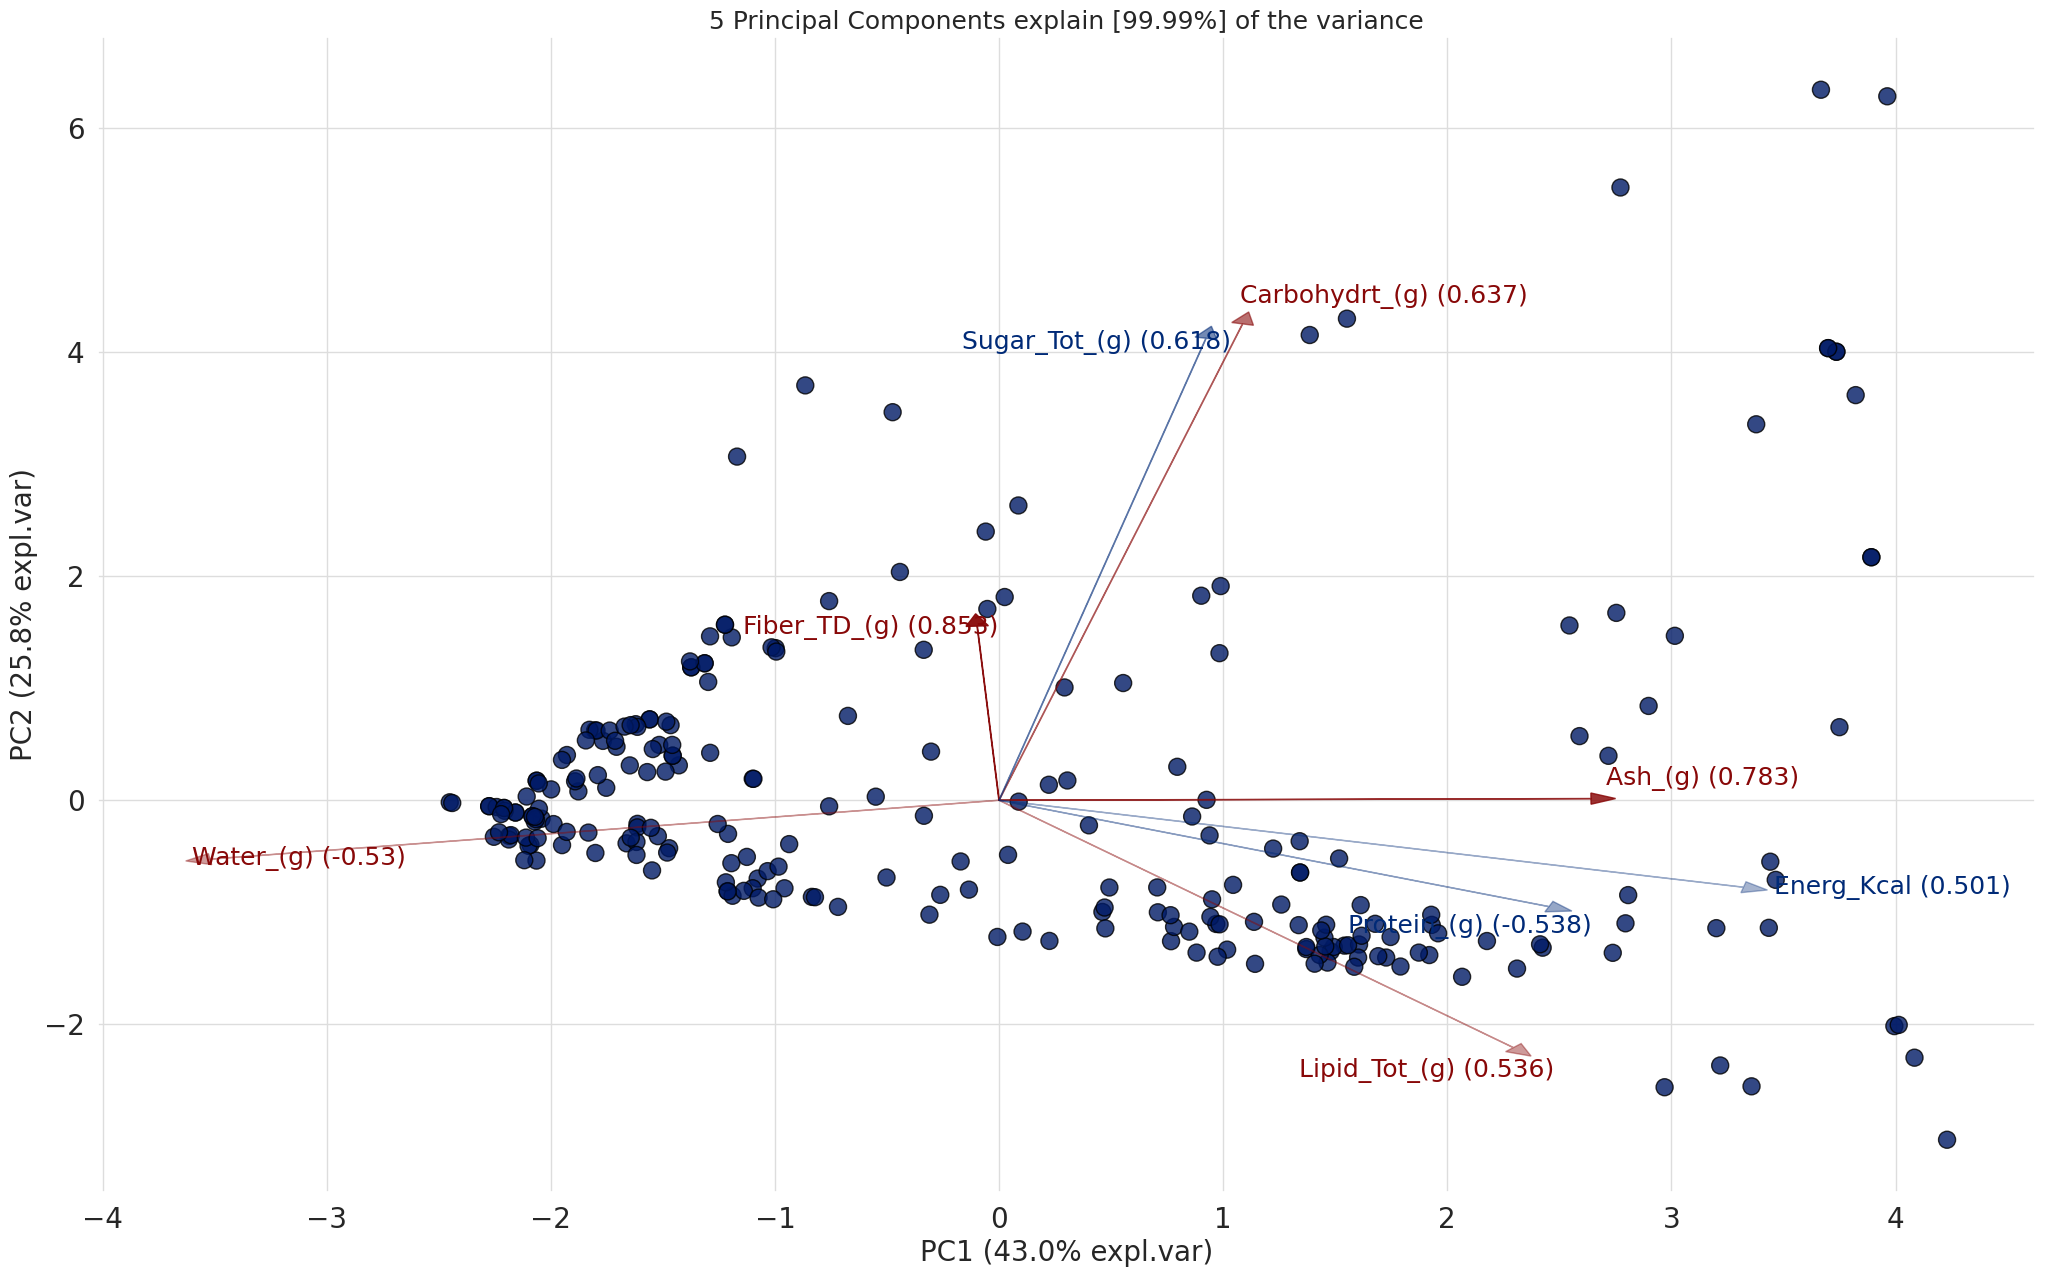

In [ ]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (43.0% expl.var)', ylabel='PC2 (25.8% expl.var)'>)

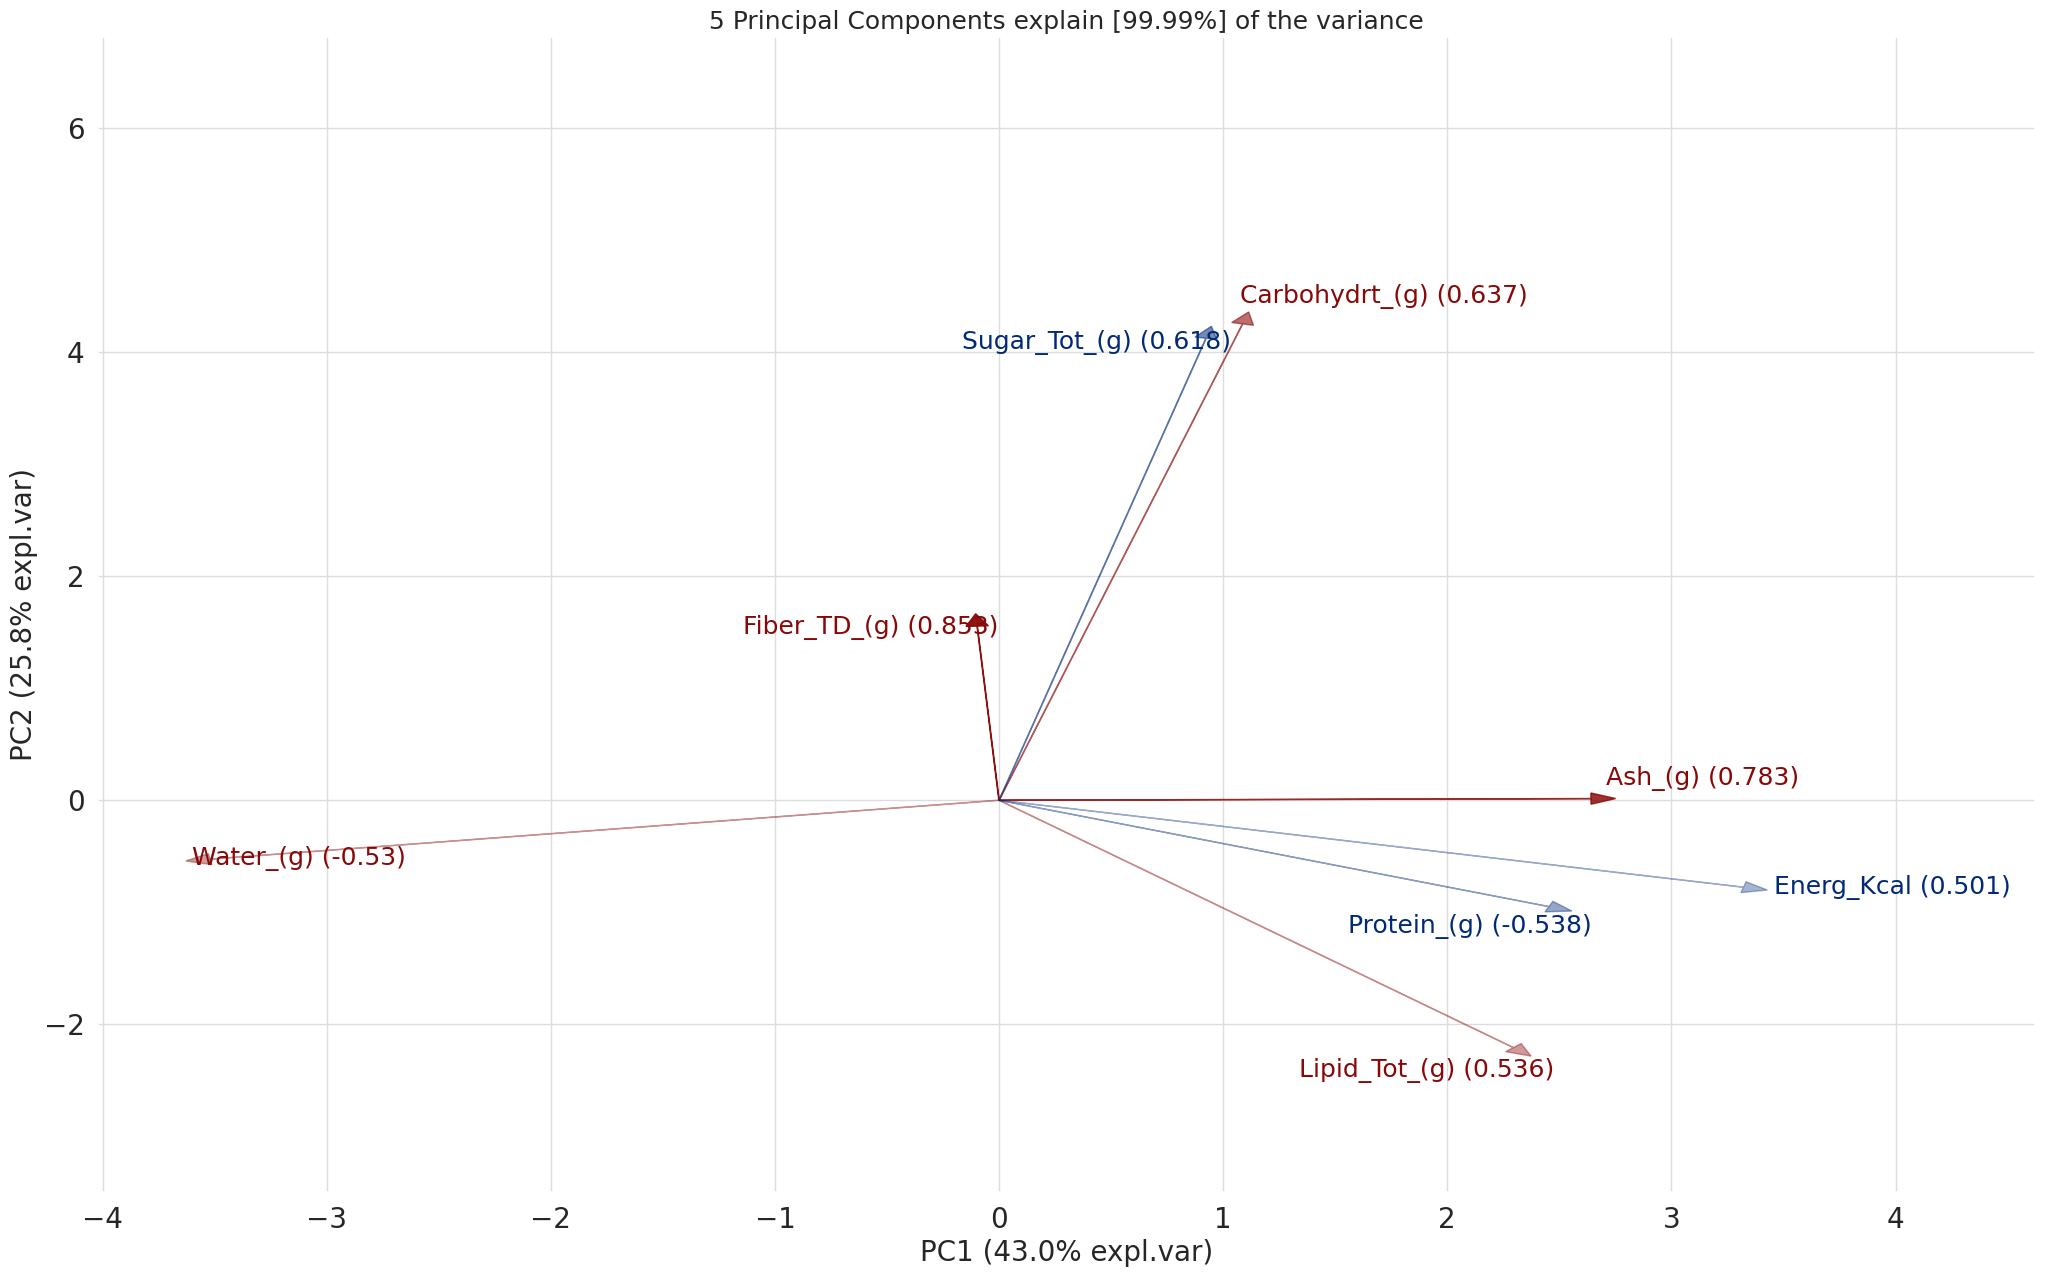

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


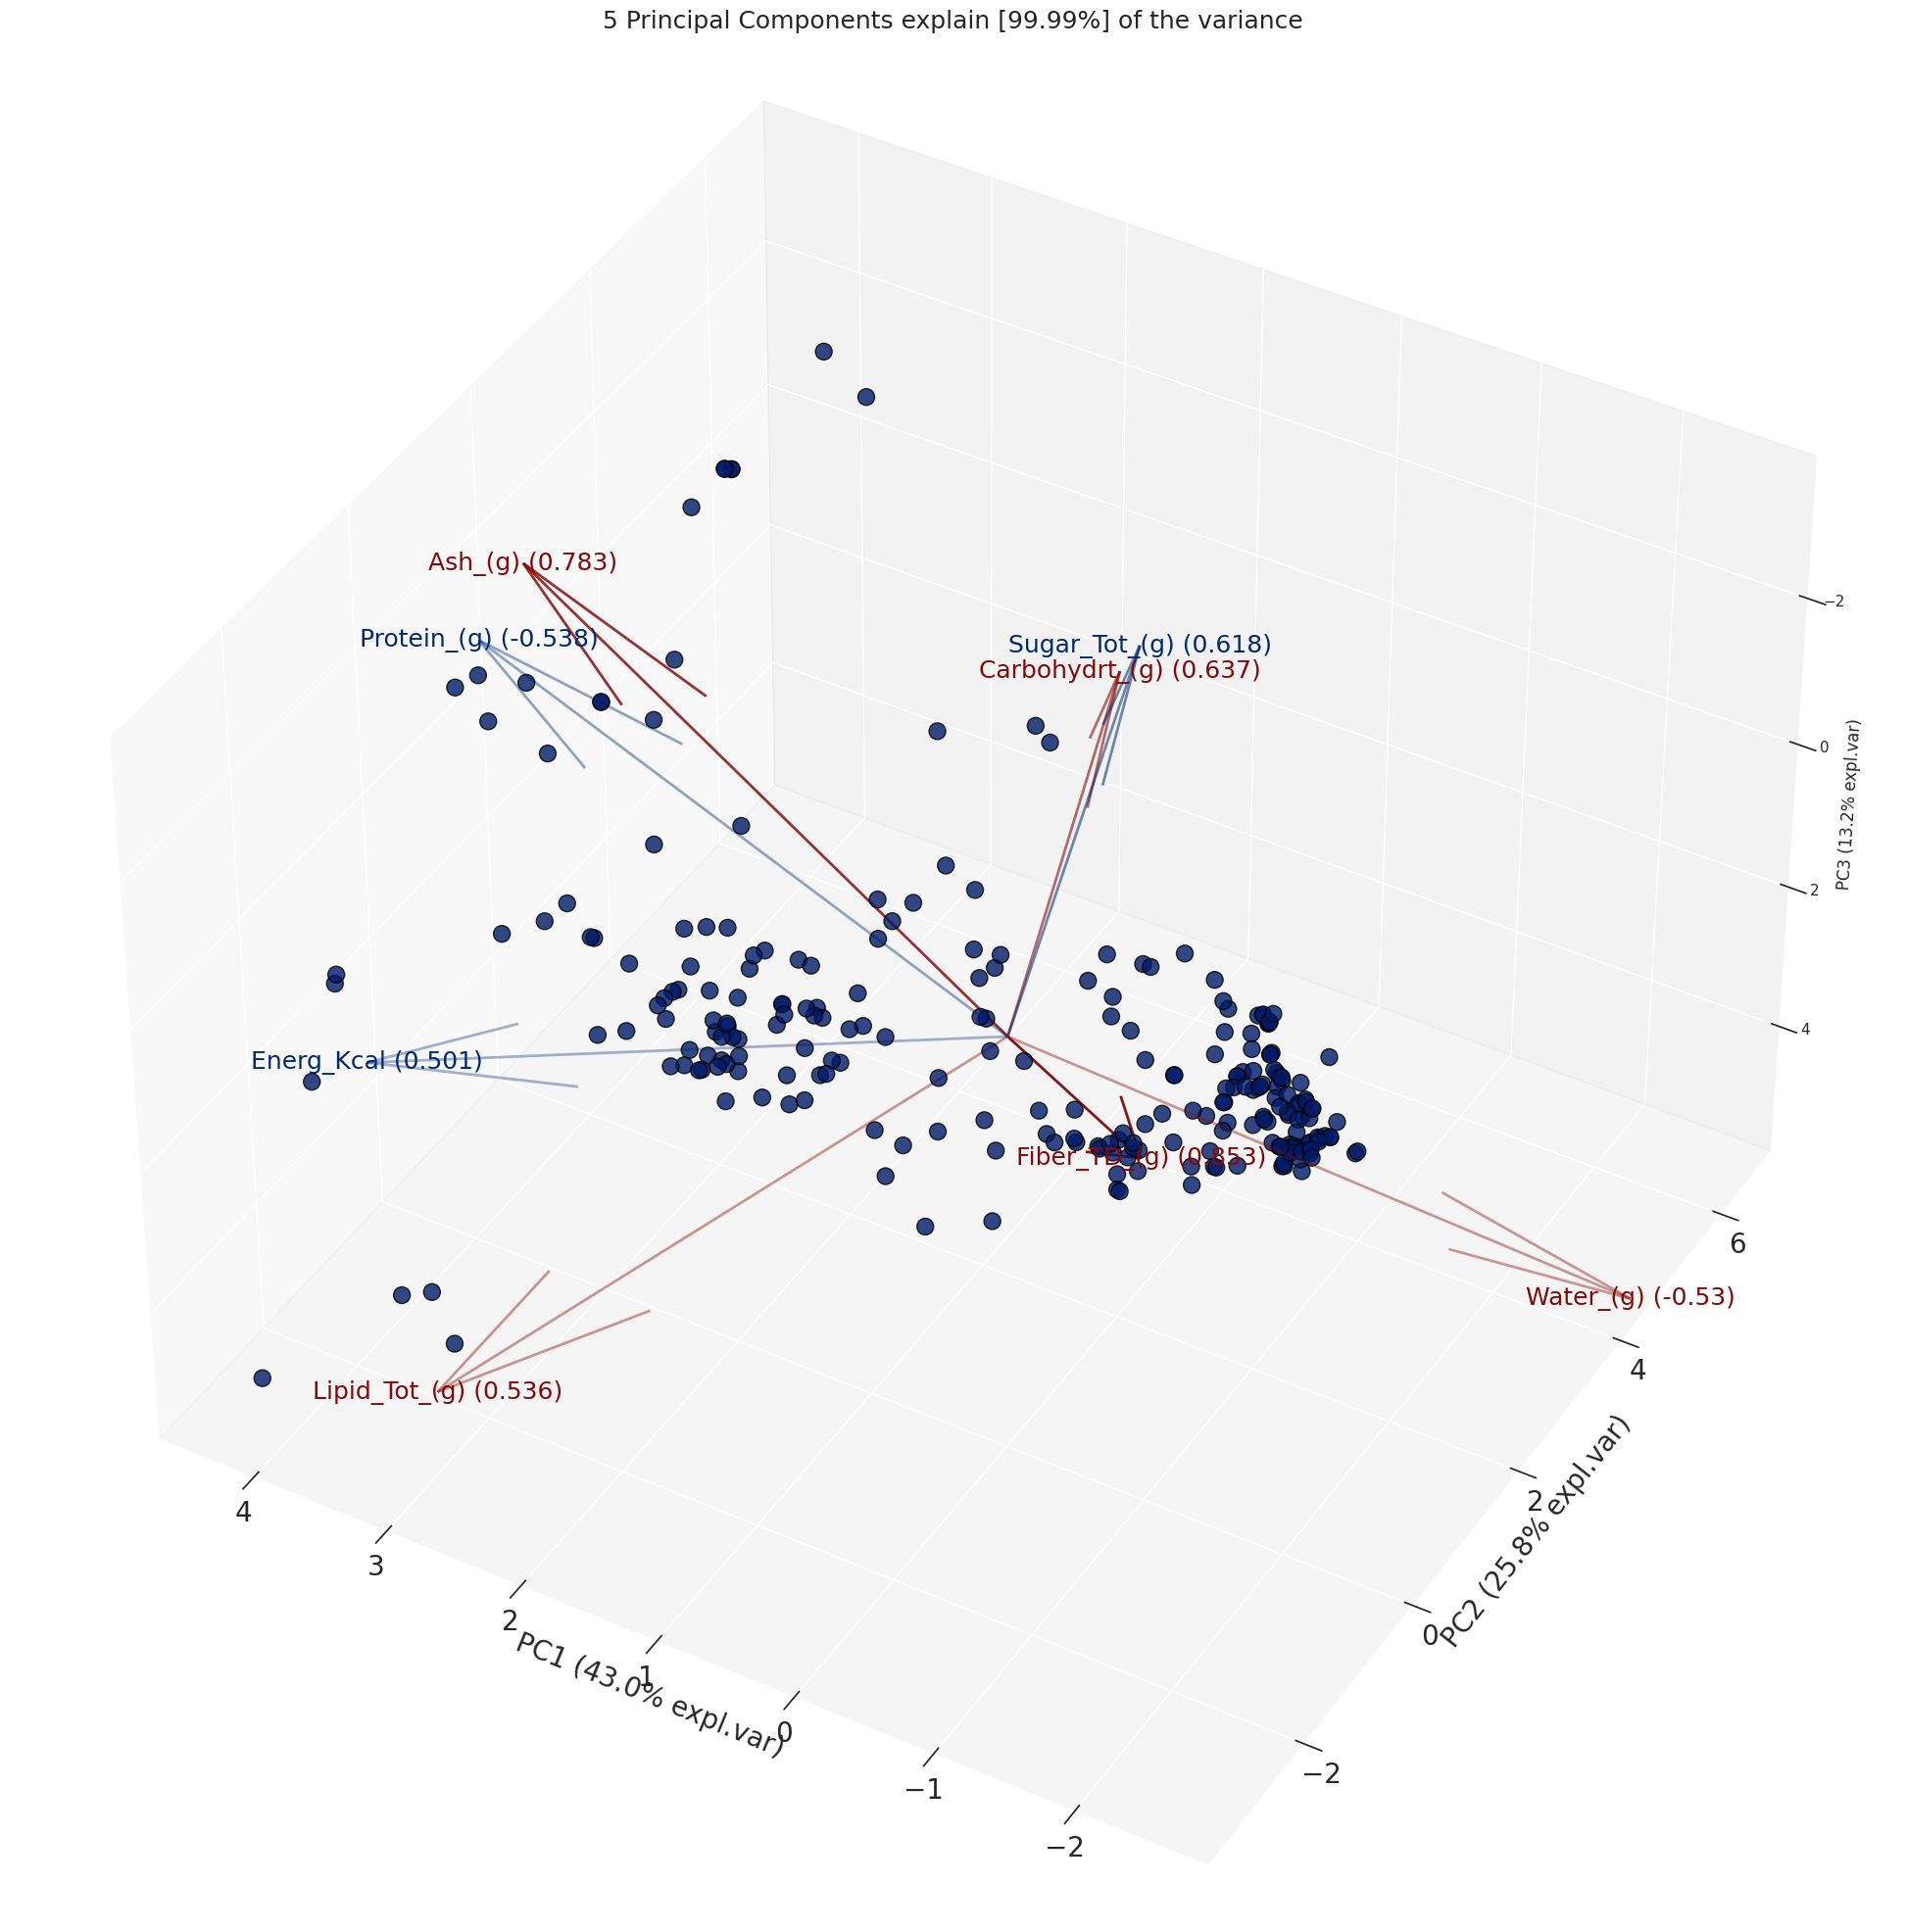

In [ ]:
ax = model.biplot3d(legend=False)

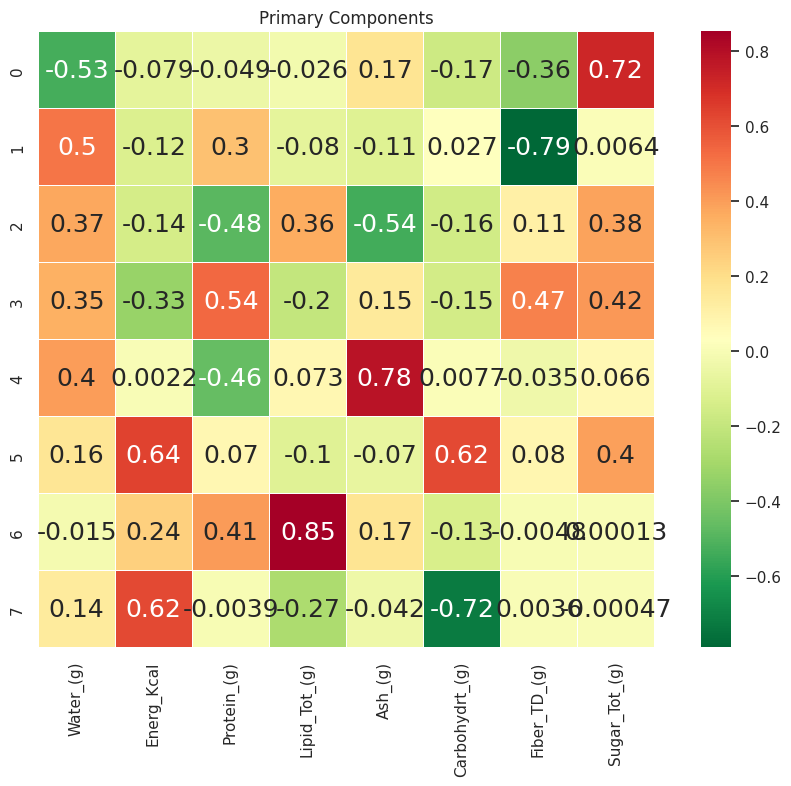

PC1:[-0.53044776  0.5011038   0.37357466  0.34697739  0.40207429  0.16278593
 -0.01527755  0.13846451]
PC2:[-0.07922659 -0.11714098 -0.14456365 -0.33387809  0.00222514  0.63711446
  0.24330399  0.61847497]
[[-5.30447759e-01 -7.92265870e-02 -4.88588926e-02 -2.61064393e-02
   1.71106243e-01 -1.71707166e-01 -3.63516277e-01  7.19982503e-01]
 [ 5.01103803e-01 -1.17140977e-01  3.00659588e-01 -8.01322029e-02
  -1.07805982e-01  2.69873309e-02 -7.91179083e-01  6.38954067e-03]
 [ 3.73574665e-01 -1.44563649e-01 -4.84276825e-01  3.62997874e-01
  -5.37679590e-01 -1.55770695e-01  1.08274393e-01  3.84921584e-01]
 [ 3.46977387e-01 -3.33878089e-01  5.35829552e-01 -2.04382446e-01
   1.46307822e-01 -1.51166542e-01  4.71780751e-01  4.15225532e-01]
 [ 4.02074289e-01  2.22513692e-03 -4.63039962e-01  7.29566773e-02
   7.82936332e-01  7.71088279e-03 -3.49095498e-02  6.58422175e-02]
 [ 1.62785932e-01  6.37114460e-01  6.97493264e-02 -1.02559017e-01
  -7.04436696e-02  6.19863973e-01  7.96044083e-02  3.95818226e-

In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Primary Components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')
print (A)

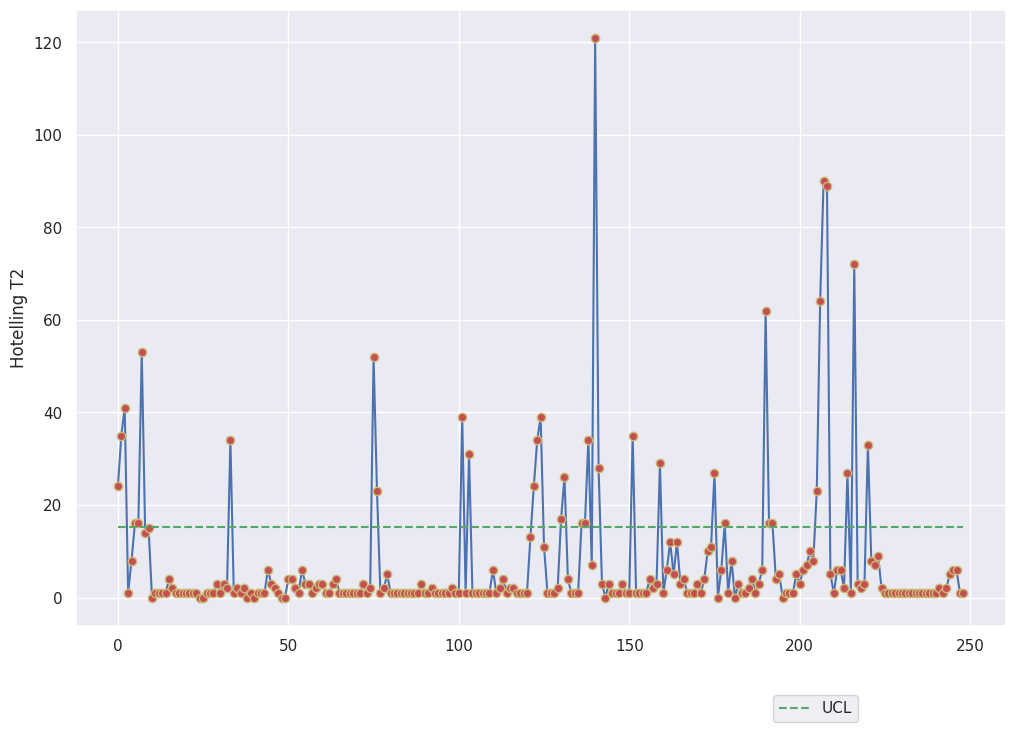

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling T2')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  0]
 [  1]
 [  2]
 [  5]
 [  6]
 [  7]
 [ 33]
 [ 75]
 [ 76]
 [101]
 [103]
 [122]
 [123]
 [124]
 [130]
 [131]
 [136]
 [137]
 [138]
 [140]
 [141]
 [151]
 [159]
 [175]
 [178]
 [190]
 [191]
 [192]
 [205]
 [206]
 [207]
 [208]
 [214]
 [216]
 [220]]


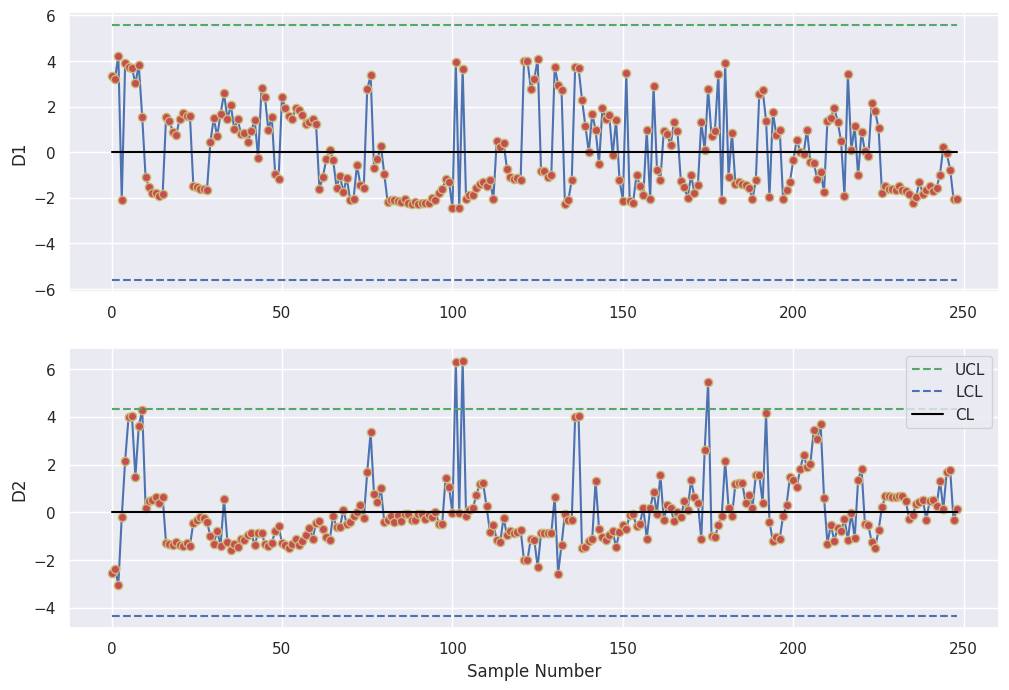

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('D1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('D2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()


In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[[101]
 [103]
 [175]]


In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']


Train Dataset Size: 174
Test Dataset Size: 75


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        24

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75



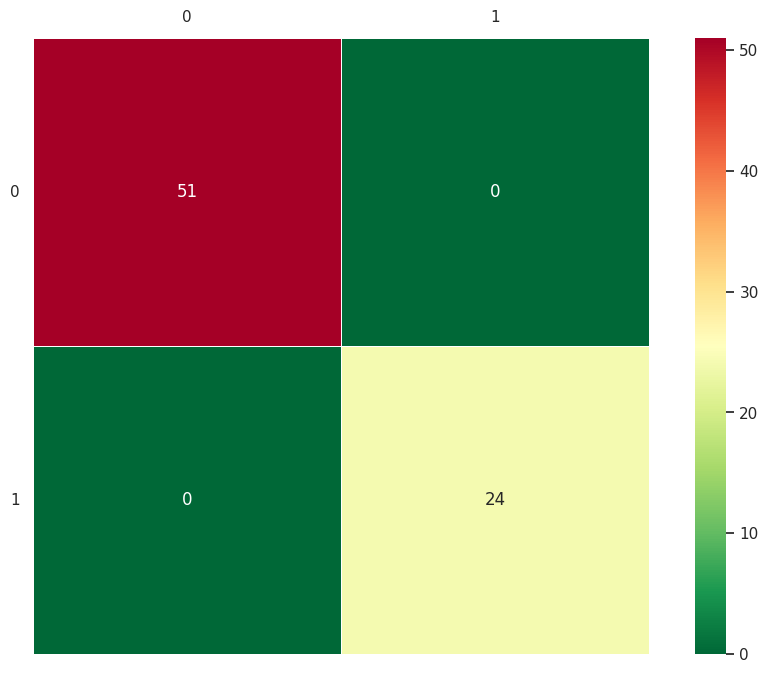

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.885     0.902     0.893        51
           2      0.783     0.750     0.766        24

    accuracy                          0.853        75
   macro avg      0.834     0.826     0.830        75
weighted avg      0.852     0.853     0.852        75



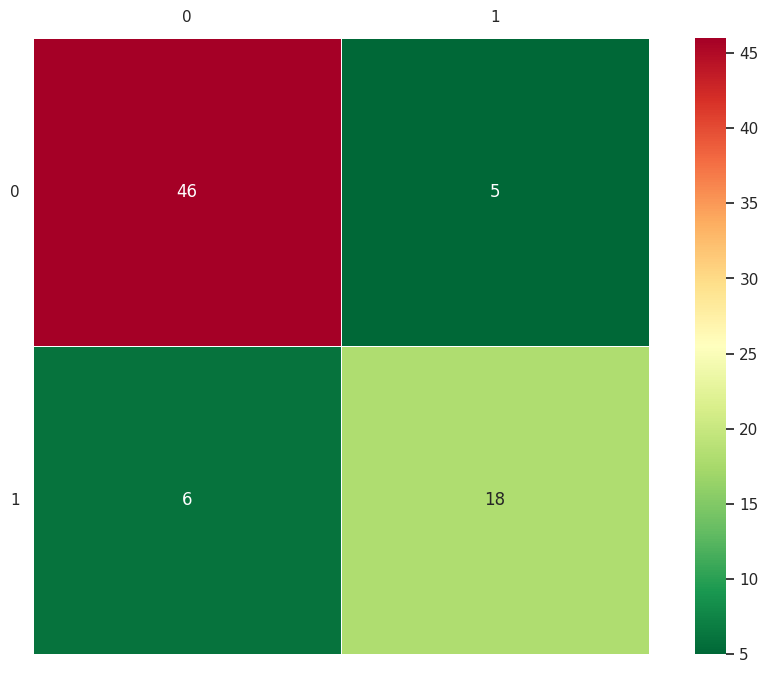

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.831     0.961     0.891        51
           2      0.875     0.583     0.700        24

    accuracy                          0.840        75
   macro avg      0.853     0.772     0.795        75
weighted avg      0.845     0.840     0.830        75



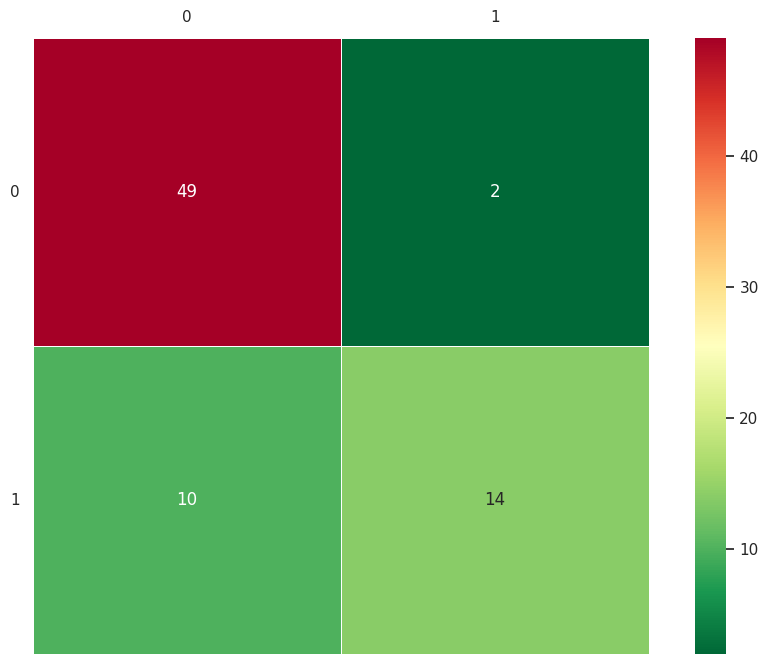

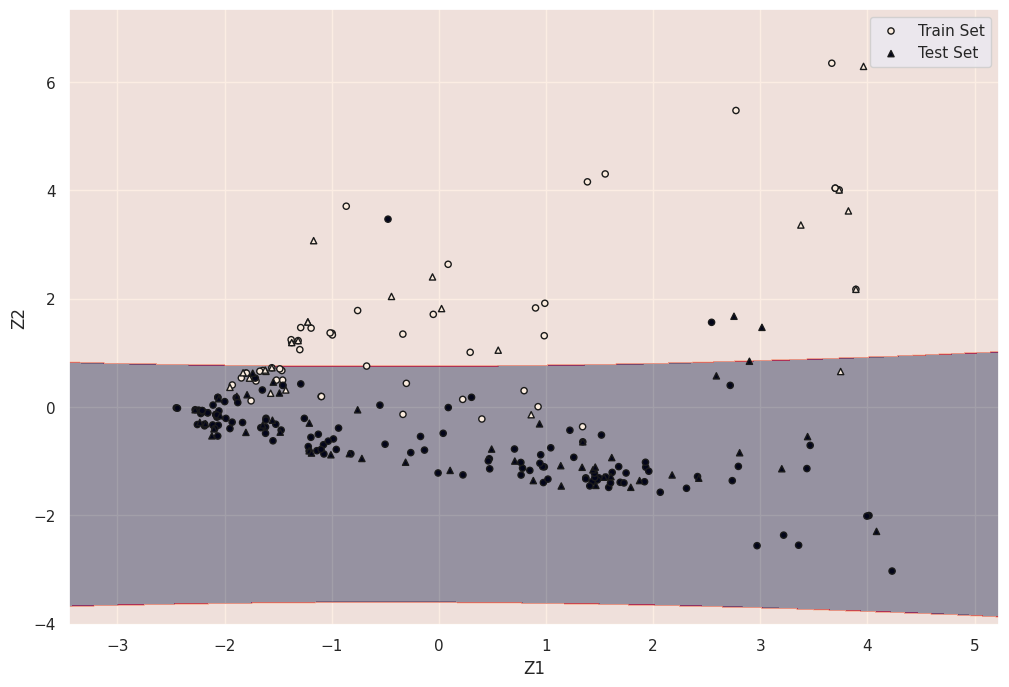

(array([ 5, 18, 38, 40, 42, 44, 46, 47, 53, 55, 56, 74]),)


In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 4}
k_Z: {'n_neighbors': 4}
k_Z12: {'n_neighbors': 4}
                                    0         1         2         3         4
knn_full_data fit_time       0.001939  0.001961  0.001930  0.001896  0.001584
knn_Z  fit_time              0.000699  0.000613  0.000560  0.000954  0.000813
knn_Z12 fit_time             0.000840  0.000755  0.000932  0.000808  0.000740
knn_full_data test_f1_macro  0.551282  0.787879  0.675926  0.756944  0.697778
knn_Z  test_f1_macro         0.925214  0.883463  0.860000  0.925214  0.871698
knn_Z12 test_f1_macro        0.883463  0.925214  0.728080  0.933712  0.817401

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.840     0.824     0.832        51
           2      0.640     0.667     0.653        24

    accuracy                          0.773        75
   macro avg      0.740     0.745     0.742        75
weighted avg      0.776     0.773   

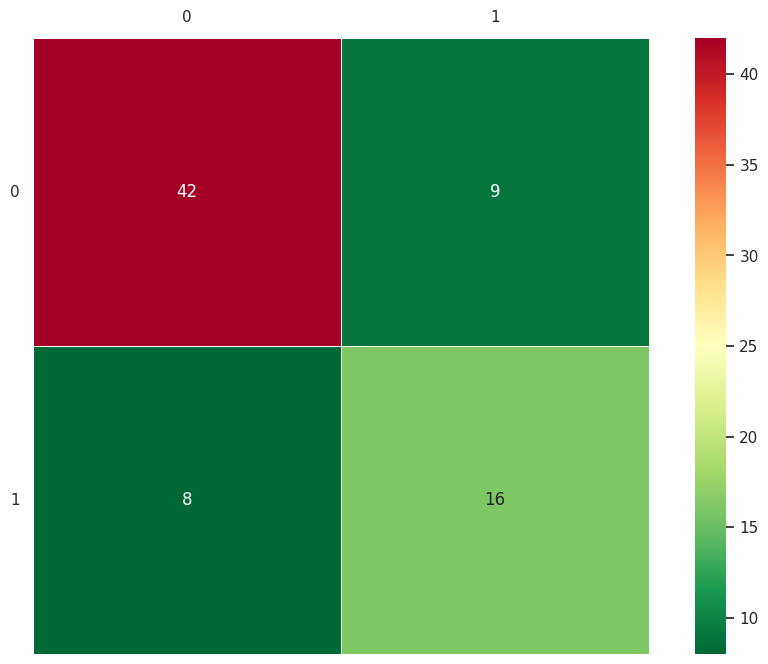

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.941     0.941     0.941        51
           2      0.875     0.875     0.875        24

    accuracy                          0.920        75
   macro avg      0.908     0.908     0.908        75
weighted avg      0.920     0.920     0.920        75



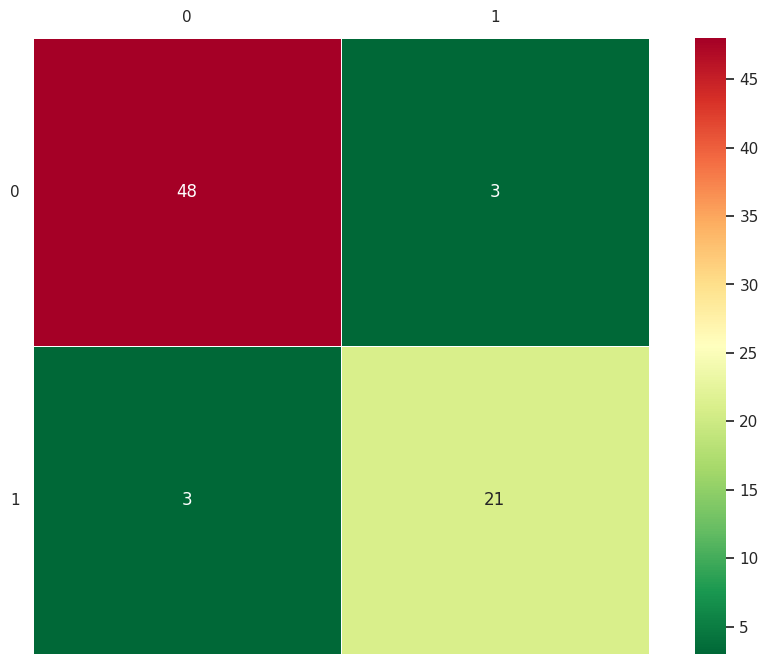

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.926     0.980     0.952        51
           2      0.952     0.833     0.889        24

    accuracy                          0.933        75
   macro avg      0.939     0.907     0.921        75
weighted avg      0.934     0.933     0.932        75



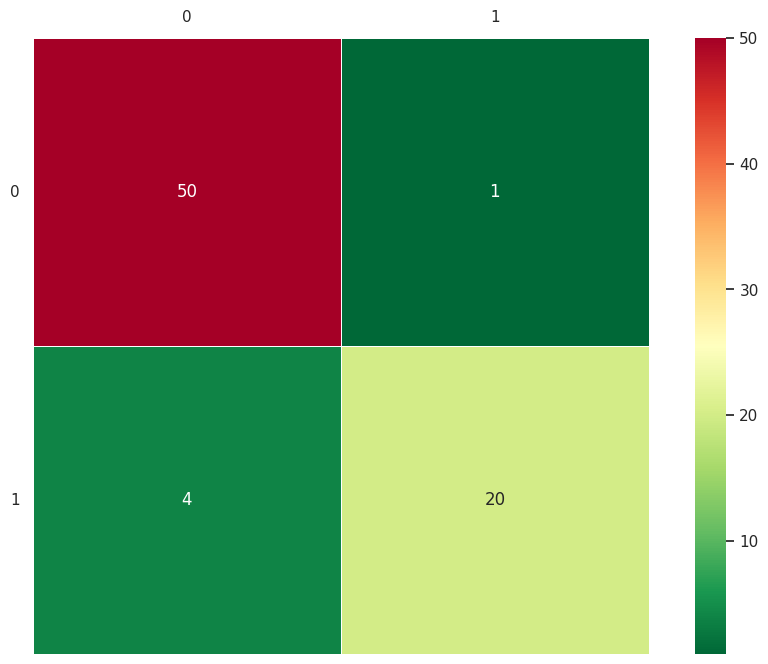

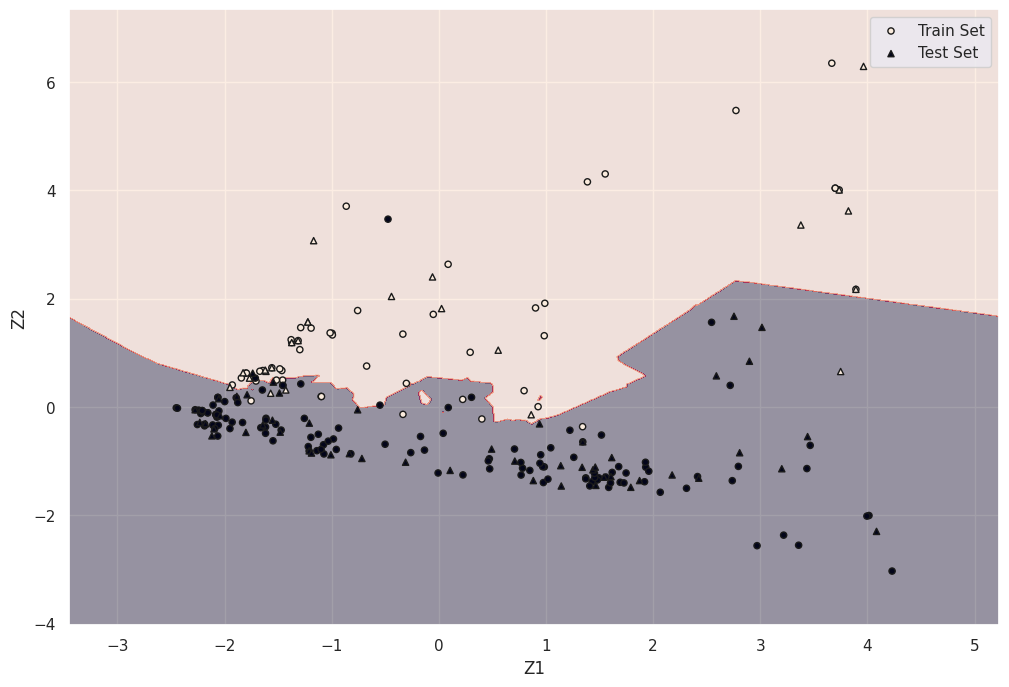

In [ ]:
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()


Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.002588  0.001917  0.002025  0.001772  0.001905
dt_Z  fit_time              0.000953  0.000818  0.000808  0.000802  0.000857
dt_Z12 fit_time             0.000618  0.000594  0.000570  0.000566  0.000578
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.930000  0.963880  0.860000  0.897959  0.773333
dt_Z12 test_f1_macro        0.963880  0.963880  0.728080  0.902868  0.817401

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        24

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000    

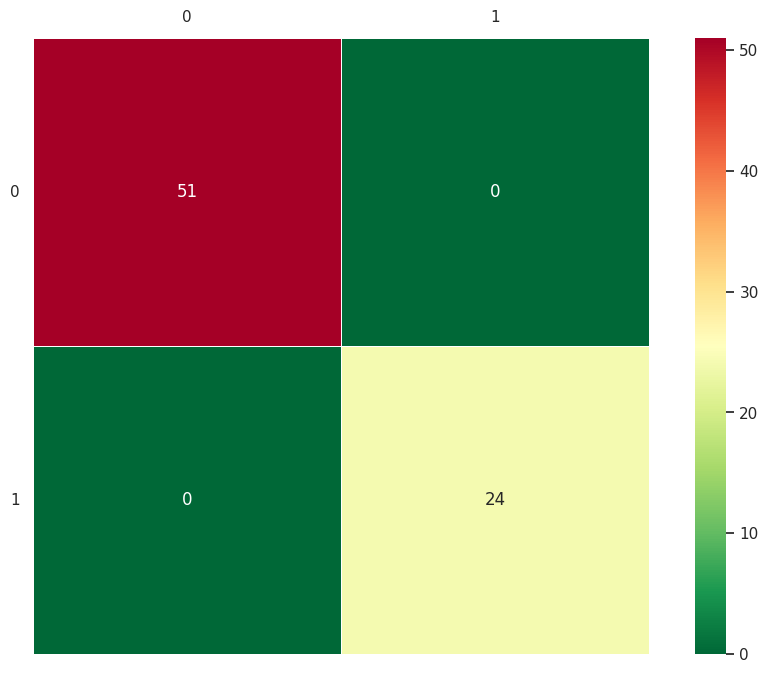

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.940     0.922     0.931        51
           2      0.840     0.875     0.857        24

    accuracy                          0.907        75
   macro avg      0.890     0.898     0.894        75
weighted avg      0.908     0.907     0.907        75



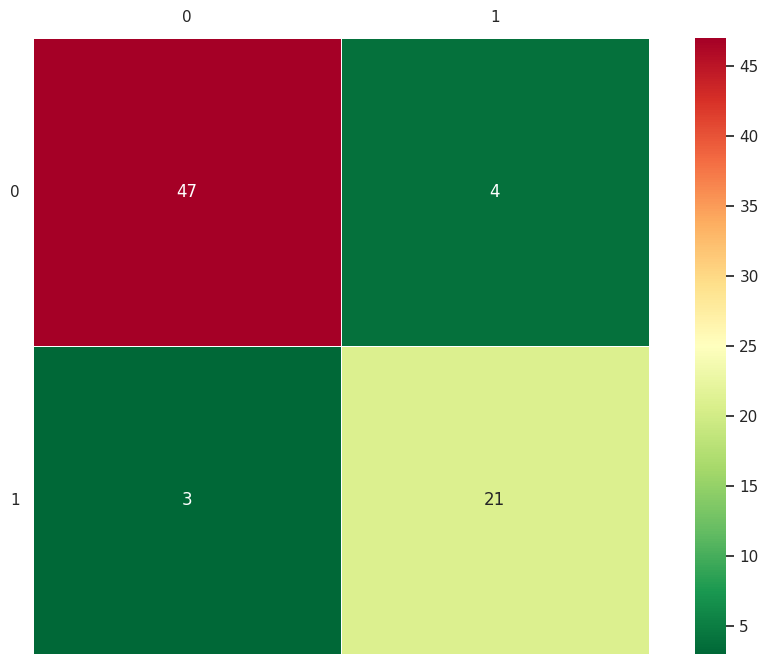

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.936     0.863     0.898        51
           2      0.750     0.875     0.808        24

    accuracy                          0.867        75
   macro avg      0.843     0.869     0.853        75
weighted avg      0.877     0.867     0.869        75



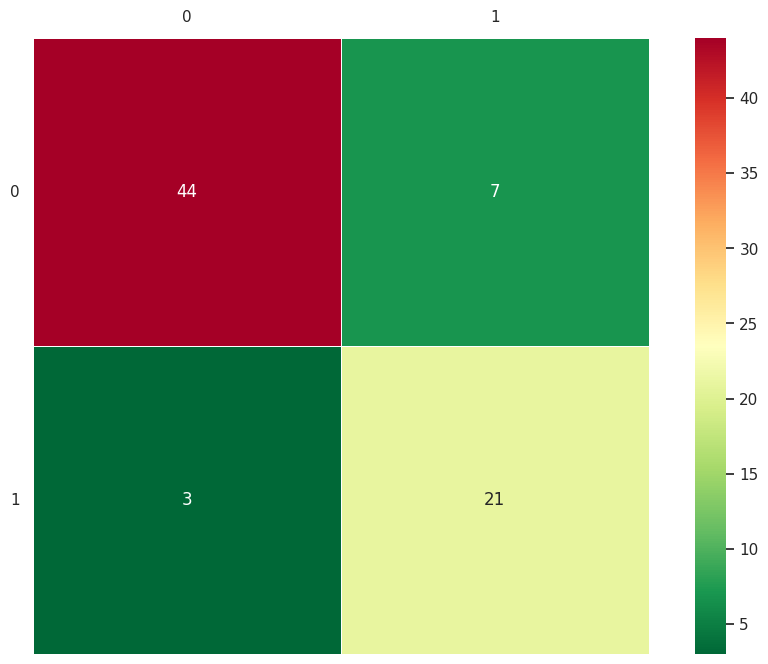

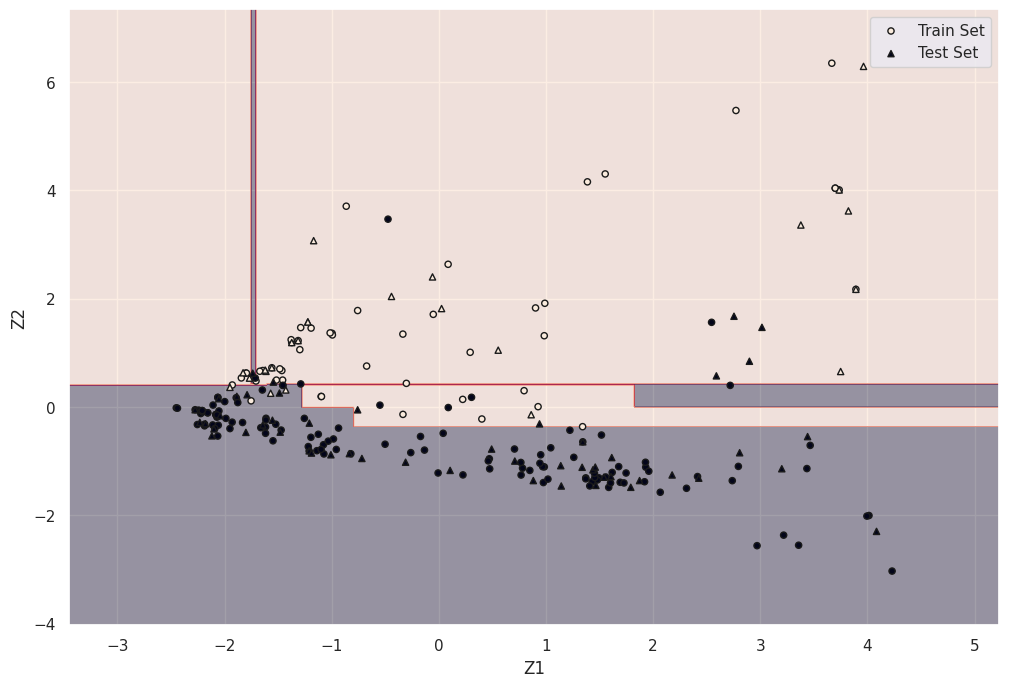

In [ ]:
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


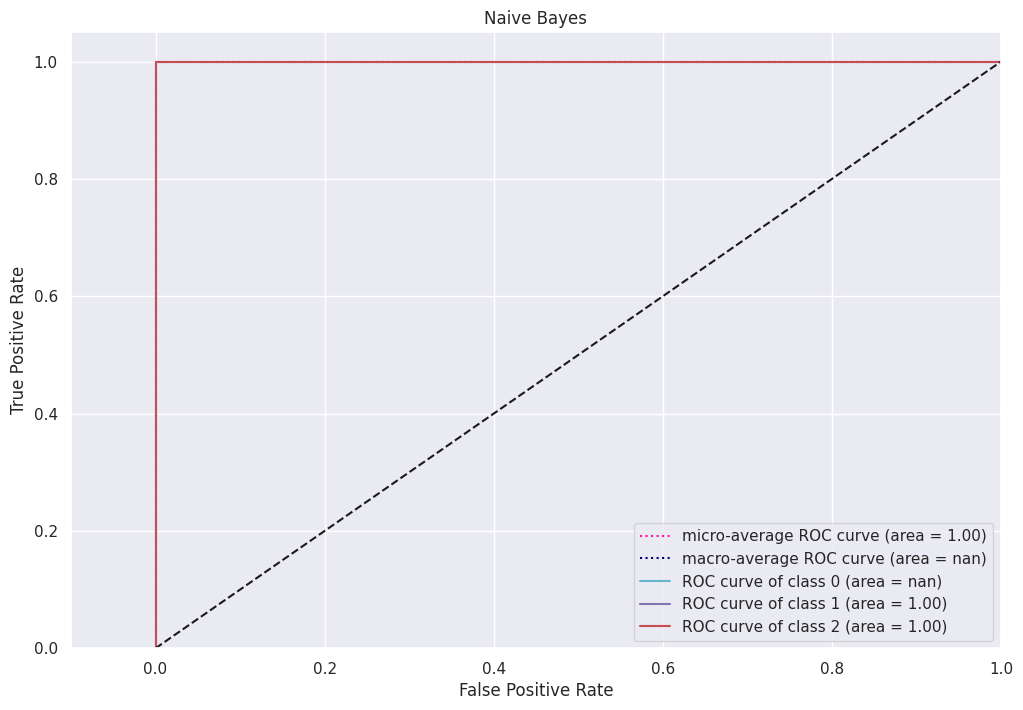

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


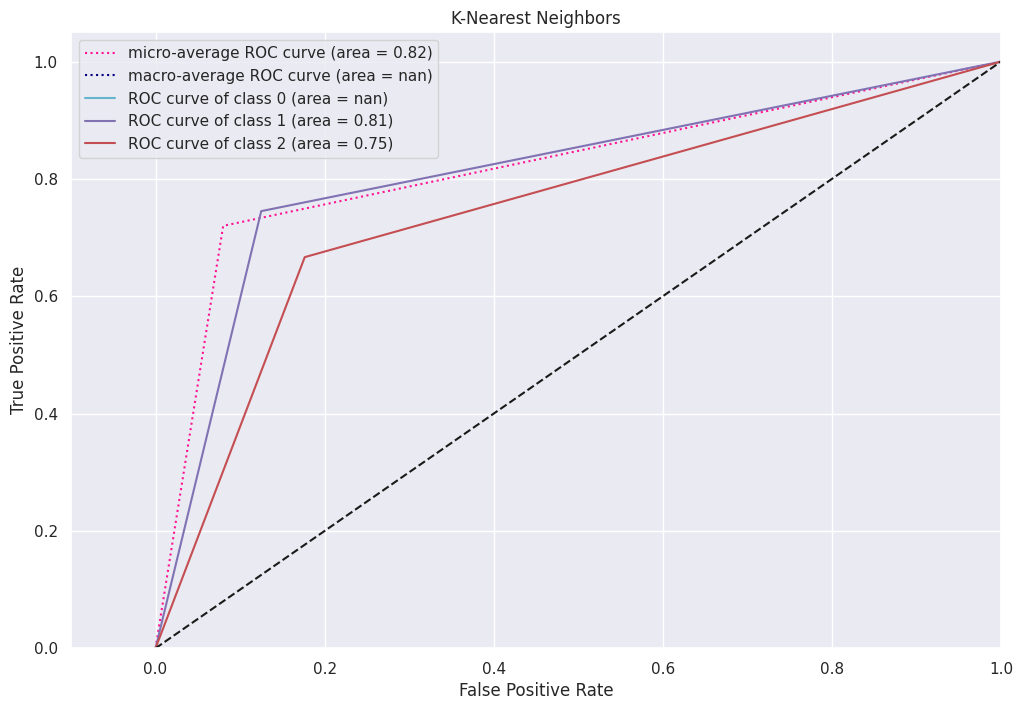

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


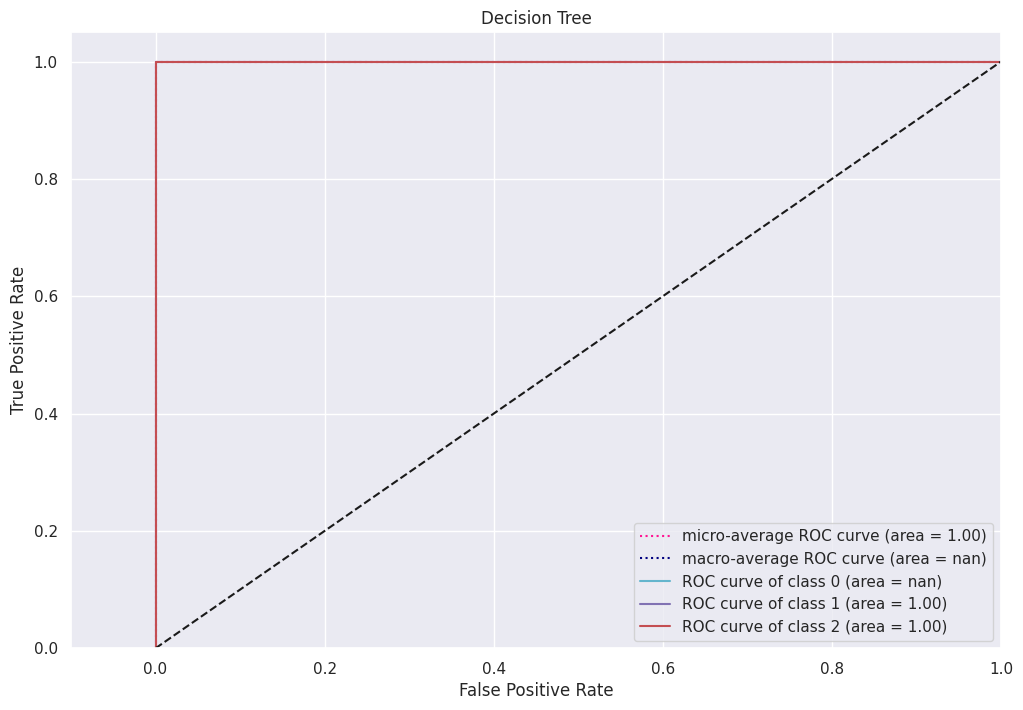

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


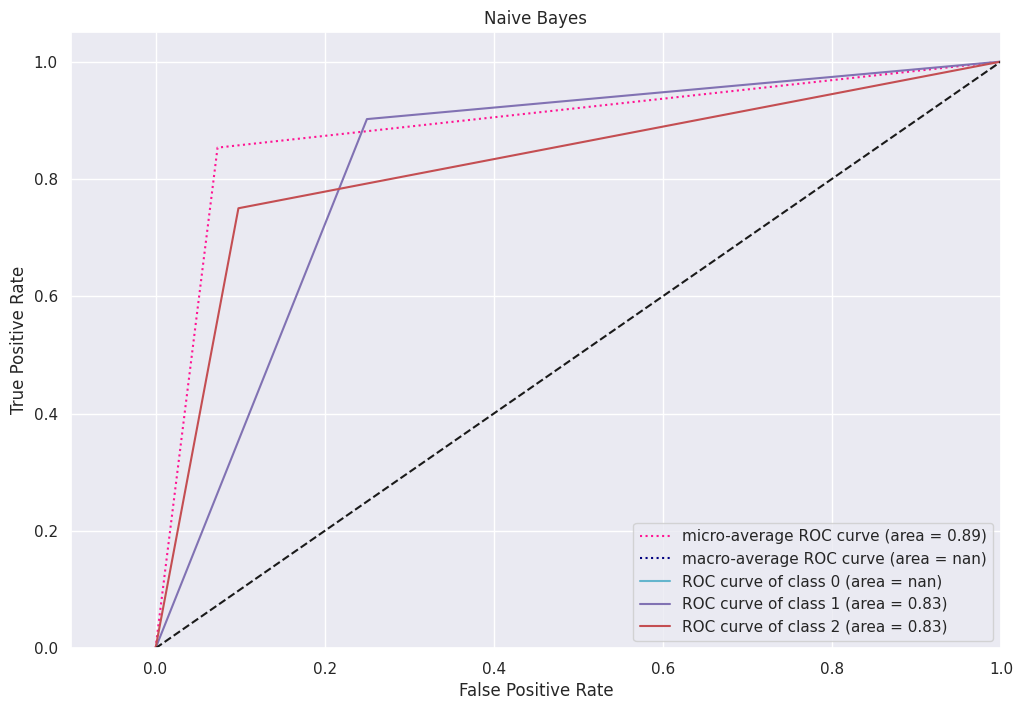

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


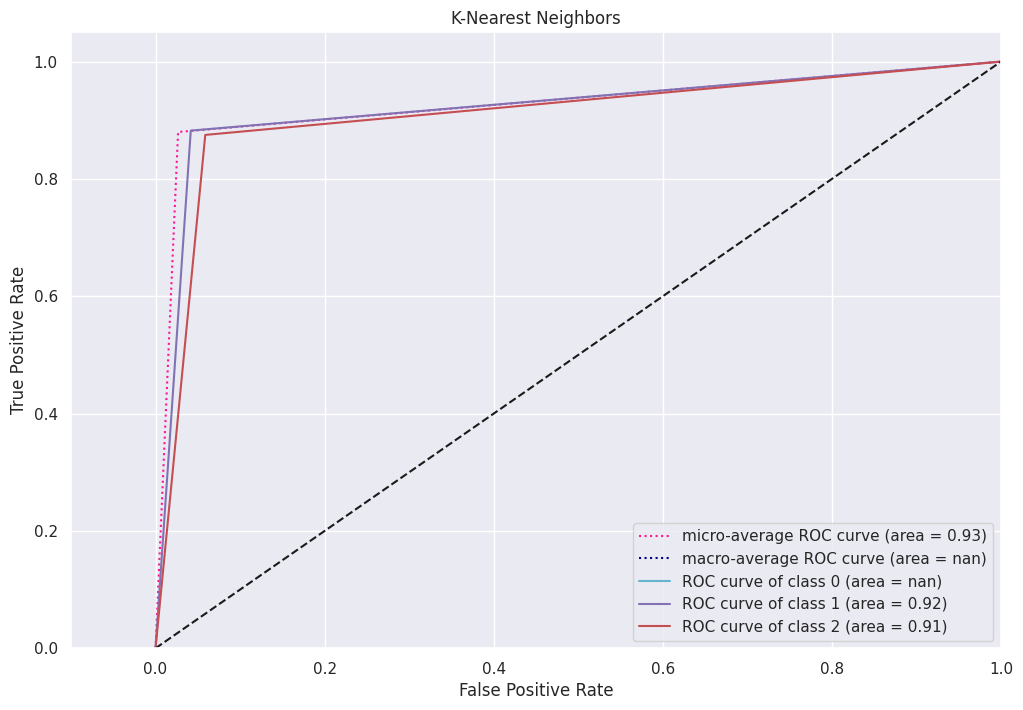

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


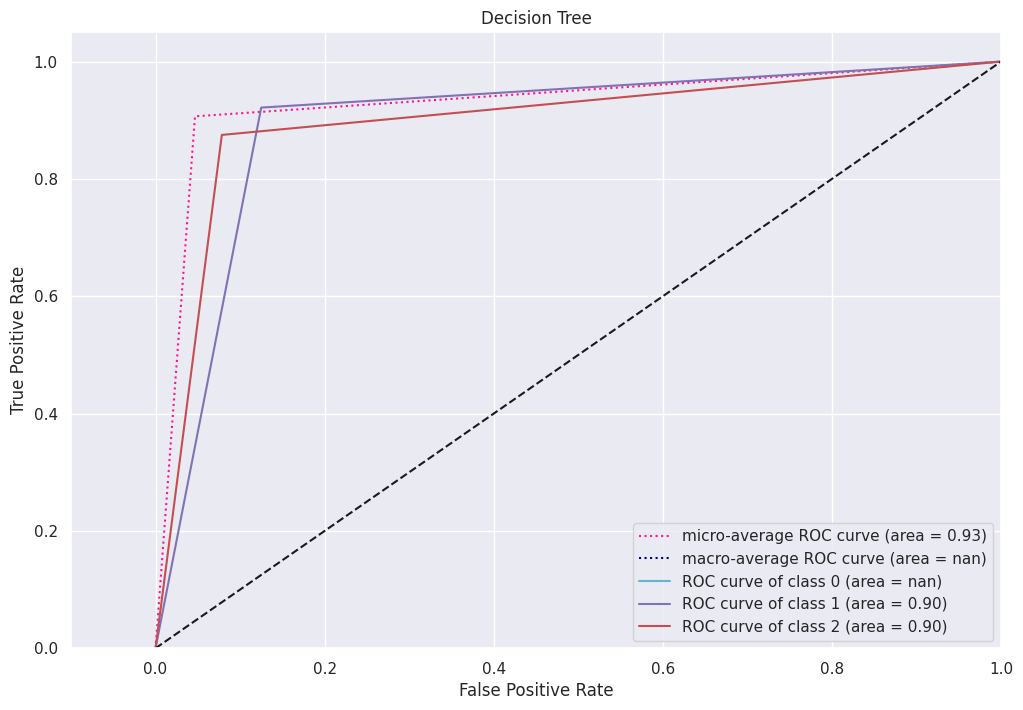

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


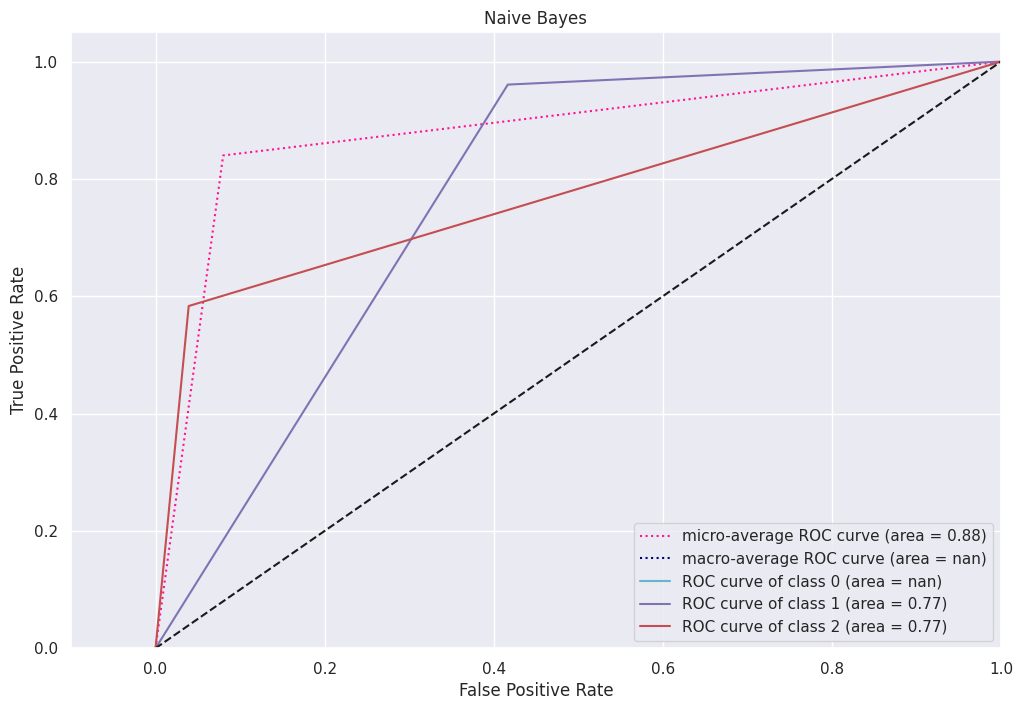

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


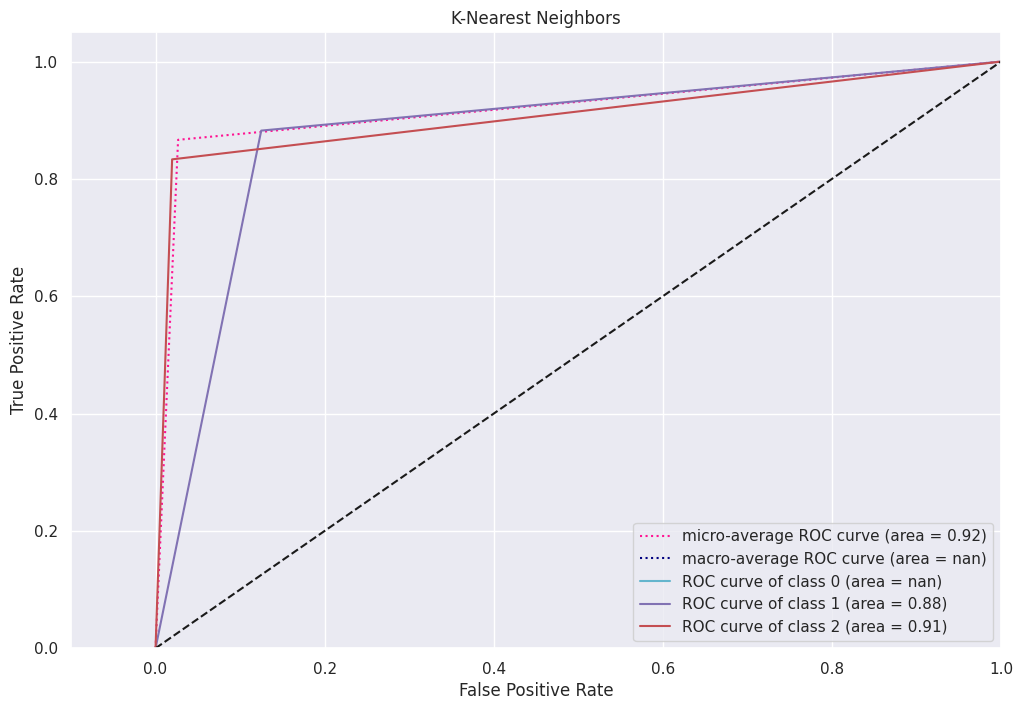

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


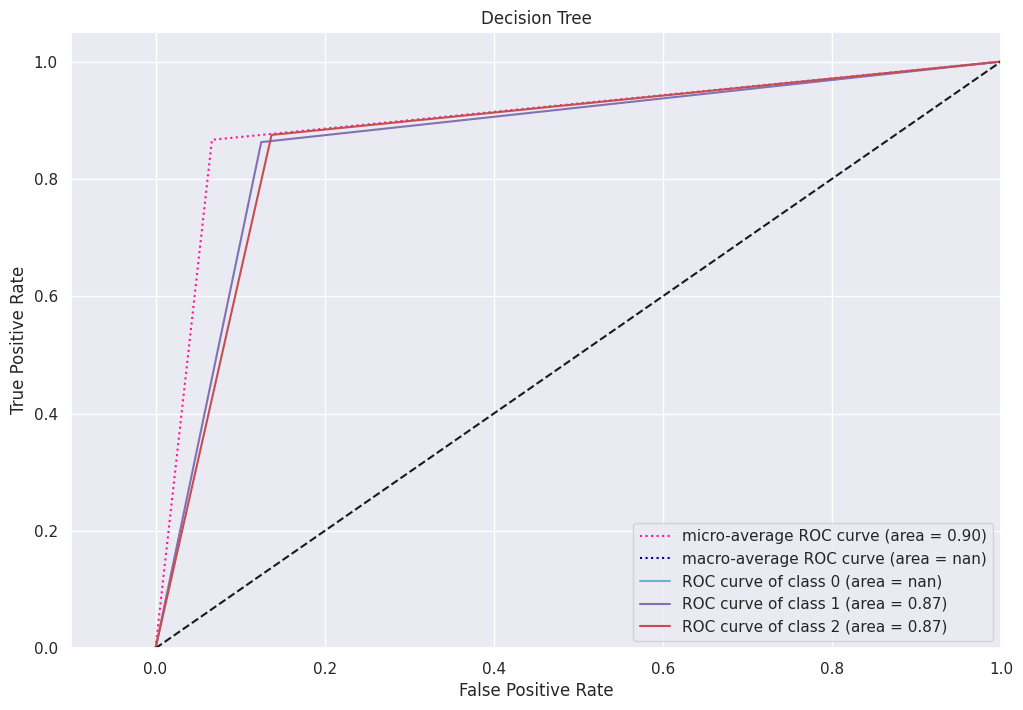

In [ ]:
datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

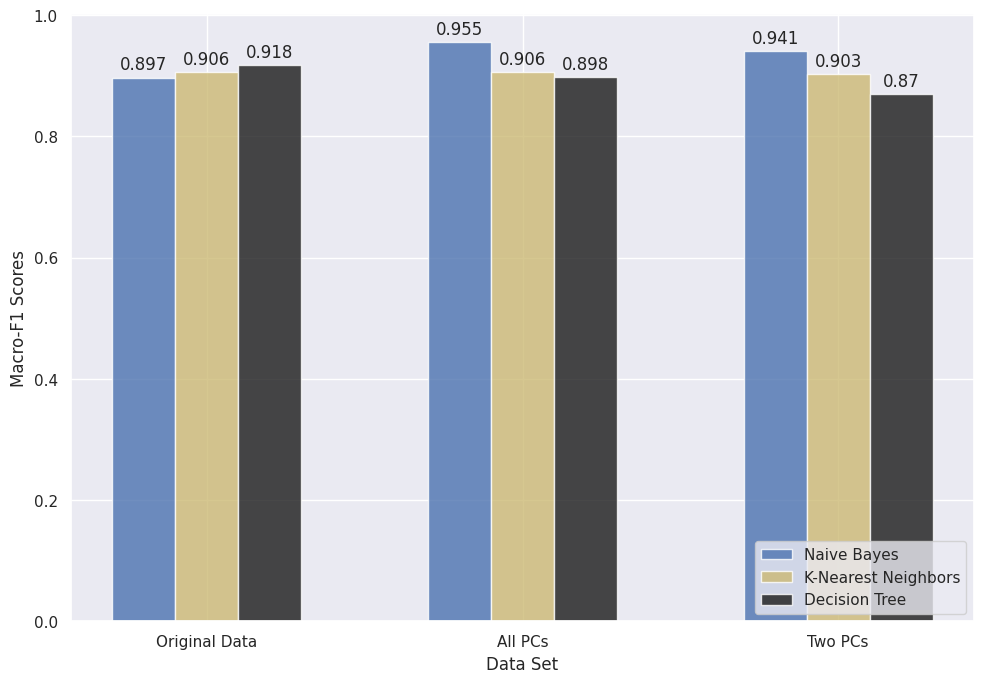

In [ ]:
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()